<center><h3>
UNIVERSIDADE FEDERAL DO PARANÁ<br>
SETOR DE EDUCAÇÃO PROFISSIONAL E TECNOLÓGICA
</center><br><br><br>

<center><H3>LUCAS MARTINS SORRENTINO</center><br><br><br>

<center><b><h3>DADOS E RACISMO ESTRUTURAL NO SUS EM CURITIBA</b></center><br><br><br>

 <p align="right">Trabalho apresentado à disciplina 'Visualização<br> de Dados e Storytelling', ministrada pela profa.<br> Dra. Isabela Mantovani Fontana ao Curso de<br>Pós-graduação de Inteligência Artificial Aplicada,<br>Turma 2025.</p><br><br><br>

<CENTER> CURITIBA<br>2025</CENTER><br><br><br>

Este trabalho foi inspirado pela tese de doutorado do sociógolo André Marega Pinhel (https://www.teses.usp.br/teses/disponiveis/8/8132/tde-31102024-135539/publico/2024_AndreMaregaPinhel_VCor.pdf), e tem como público alvo a população média da cidade de Curitiba.<br>
<br><br>
<h4>História:</h4>
<p>O Sistema Único de Saúde, o SUS, nasceu de um princípio fundamental: a saúde é um direito de todos e um dever do Estado. Uma promessa de acesso universal, integral e, acima de tudo, igualitário.
Por trás de cada atendimento realizado no SUS, existe uma pessoa. Um cidadão com uma história, uma família, e uma necessidade de cuidado. E quando somamos milhões desses atendimentos, eles se transformam em dados, em estatísticas.</p>

<p>O que esses números nos contam? A história que emerge deles é uma só para todos os brasileiros?</p>

<p>Nesta apresentação, vamos sair do campo das impressões e mergulhar na frieza dos números. Os gráficos que vocês verão a seguir não contêm opiniões, mas sim evidências. Eles são um retrato estatístico de como a desigualdade racial se manifesta no acesso e na qualidade do atendimento em saúde no Brasil. Tenatrei usar os dados para tornar visível um problema estrutural necessário para discutir caminhos de um SUS verdadeiramente para todos.</p>
<p>Neste trabalho eu vou usar a base de dados de Autorização para Internação Hospitalar (AIH), que é a base do Sistema de Informações Hospitalares (SIH/SUS). Este sistema registra dados detalhados sobre as internações, em todo o Brasil, porém eu vou trabalhar exclusivamente com os dados das instituições de saúde da capital paranaense. Nesta base de dados cada registro corresponde a uma AIH, que é um documento obrigatório para autorizar e registrar uma internação hospitalar pelo sistema público.</p>
<p>Entre as informações presentes na base estão: dados do paciente (idade, sexo, raça/cor, município de residência), dados do atendimento (tipo de internação, motivo, procedimentos realizados, data de entrada e alta), diagnóstico, características do hospital e informações administrativas (valores pagos, códigos de procedimentos e profissionais envolvidos).

A base AIH/SIH/SUS é fundamental para monitorar o perfil das internações, planejar políticas de saúde, acompanhar a alocação de recursos e identificar desigualdades no acesso e na qualidade dos atendimentos hospitalares, incluindo recortes por raça/cor, região, faixa etária e outros fatores.</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

caminho_do_arquivo = 'limpando17.07.25.csv'

    # 1. Carrega os dados originais do arquivo CSV para um DataFrame.
df_original = pd.read_csv(caminho_do_arquivo)
print(f"Arquivo '{caminho_do_arquivo}' carregado com sucesso.")
print(f"O DataFrame original tem {len(df_original)} linhas.")

    # 2. Cria uma cópia explícita do DataFrame para manipulação.
    # Todas as modificações serão feitas nesta cópia.
df = df_original.copy()
print("Cópia do DataFrame criada para processamento.")


Arquivo 'limpando17.07.25.csv' carregado com sucesso.
O DataFrame original tem 4476243 linhas.
Cópia do DataFrame criada para processamento.


O gráfico abaixo é um simples cruzamento de dados sobre os atendimentos de internação hospitalar com base na raça. Repare que o "sem informação" é quando a raça não é informada.


Gerando o gráfico com limites de eixo ajustados...

Gráfico salvo com sucesso como 'proporcao_raca_ate_2021_corrigido.png'!


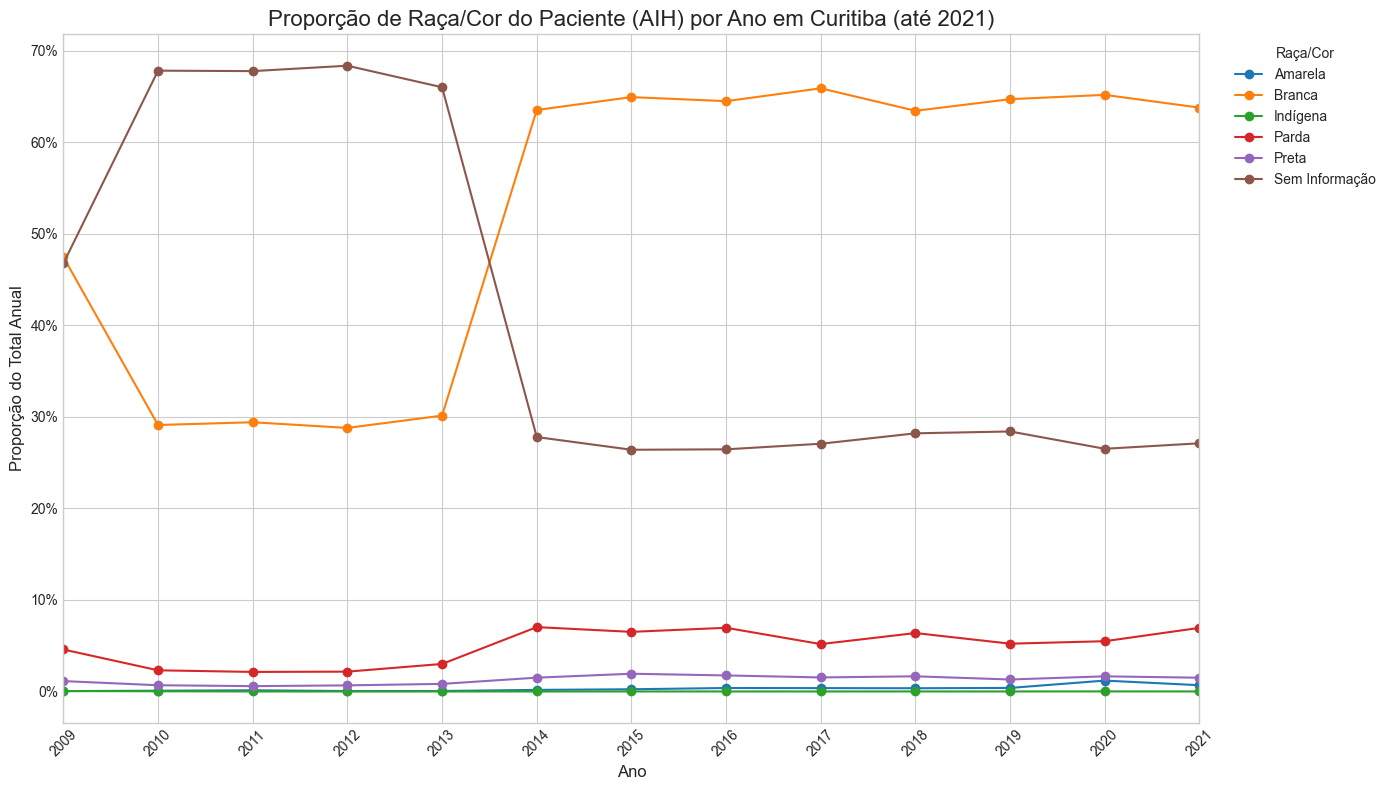

In [16]:
    # --- PREPARAÇÃO DOS DADOS ---
df_filtrado = df.dropna(subset=['ano', 'raca_cor_paciente'])
    # 1. Cria uma tabela de contagem com anos nas linhas e raça/cor nas colunas
    # Garante que 'ano' seja do tipo inteiro
df_filtrado['ano'] = df_filtrado['ano'].astype(int)
    
# Filtra o DataFrame para incluir dados apenas até o ano de 2021
df_filtrado21 = df_filtrado[df_filtrado['ano'] <= 2021]

    # 1. Cria a tabela de contagem
contagens = pd.crosstab(df_filtrado21['ano'], df_filtrado21['raca_cor_paciente'])

    # 2. Calcula as proporções
proporcoes = contagens.div(contagens.sum(axis=1), axis=0)
proporcoes.sort_index(inplace=True) # Garante a ordem dos anos

    # --- GERAÇÃO DO GRÁFICO ---
print("\nGerando o gráfico com limites de eixo ajustados...")

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 8))

proporcoes.plot(kind='line', marker='o', ax=ax)

    # --- FORMATAÇÃO E SOLUÇÃO DO PROBLEMA ---
    
    # Define o título e os rótulos
ax.set_title('Proporção de Raça/Cor do Paciente (AIH) por Ano em Curitiba (até 2021)', fontsize=16)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Proporção do Total Anual', fontsize=12)
ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))

    # Garante que todos os anos sejam exibidos como ticks
ax.set_xticks(proporcoes.index)
plt.xticks(rotation=45)
    
    # (A SOLUÇÃO) Define o limite do eixo X para começar e terminar exatamente com os dados
ano_inicio = proporcoes.index.min()
ano_fim = proporcoes.index.max()
ax.set_xlim(ano_inicio, ano_fim)

    # Move a legenda para fora do gráfico
ax.legend(title='Raça/Cor', bbox_to_anchor=(1.02, 1), loc='upper left')
    
plt.tight_layout()

    # Salva o gráfico
caminho_saida_grafico = 'proporcao_raca_ate_2021_corrigido.png'
plt.savefig(caminho_saida_grafico)

print(f"\nGráfico salvo com sucesso como '{caminho_saida_grafico}'!")

O conceito para explicar a ausênica desses dados sobre raça é "subnotificação", ela por sí já é uma evidência histórica sobre o racismo no Brasil. Os problemas raciais no Brasil foram sistematicamente ocultados em nossa história em favor de um mito de democracia racial, o que reforçou a dimensão estrutural do racismo. <br><br>
Em outubro de 2022 o campo 'raça' passou a ser de preenchimento obrigatório no sistema das AIHs, verifiquem o mesmo padrão gráfico incluindo os anos de 22 à 24.


--- Proporção de cada Raça/Cor por Ano (incluindo 'Ignorado') ---
raca_cor_paciente  Amarela  Branca  Indígena  Parda  Preta  Sem Informação
ano                                                                       
2009                  0.04   47.44      0.05   4.59   1.13           46.75
2010                  0.08   29.10      0.02   2.31   0.68           67.80
2011                  0.13   29.40      0.00   2.13   0.58           67.75
2012                  0.05   28.78      0.00   2.17   0.67           68.34
2013                  0.05   30.13      0.00   3.01   0.83           65.99
2014                  0.17   63.50      0.00   7.03   1.51           27.79
2015                  0.24   64.91      0.00   6.51   1.94           26.40
2016                  0.38   64.47      0.00   6.96   1.75           26.44
2017                  0.37   65.87      0.00   5.17   1.53           27.05
2018                  0.35   63.42      0.00   6.38   1.66           28.19
2019                  0.39   64.6

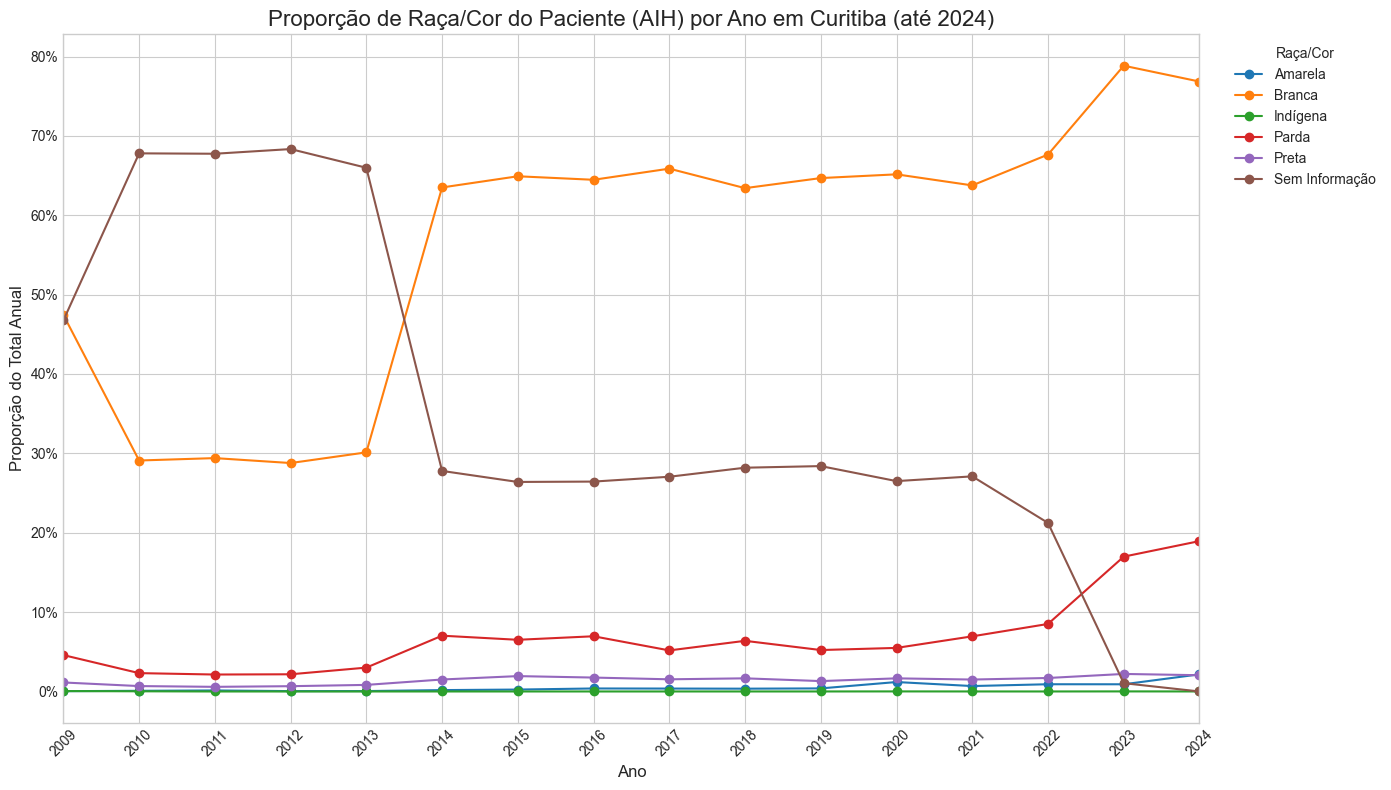

In [17]:
    # --- PREPARAÇÃO DOS DADOS ---
df_filtrado = df.dropna(subset=['ano', 'raca_cor_paciente'])
    # 1. Cria uma tabela de contagem com anos nas linhas e raça/cor nas colunas
contagens = pd.crosstab(df_filtrado['ano'], df['raca_cor_paciente'])

    # 2. Divide cada linha pela soma da linha para obter a proporção
proporcoes = contagens.div(contagens.sum(axis=1), axis=0)

print("\n--- Proporção de cada Raça/Cor por Ano (incluindo 'Ignorado') ---")
print((proporcoes * 100).round(2))

    # --- GERAÇÃO DO GRÁFICO ---
print("\nGerando o gráfico de série temporal...")

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 8))

    # Plota automaticamente cada coluna (cada raça/cor) como uma linha separada
proporcoes.plot(kind='line', marker='o', ax=ax)

    # Formatação do gráfico

     # Define o título e os rótulos
ax.set_title('Proporção de Raça/Cor do Paciente (AIH) por Ano em Curitiba (até 2024)', fontsize=16)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Proporção do Total Anual', fontsize=12)
ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))

    # Garante que todos os anos sejam exibidos como ticks
ax.set_xticks(proporcoes.index)
plt.xticks(rotation=45)
    
    # (A SOLUÇÃO) Define o limite do eixo X para começar e terminar exatamente com os dados
ano_inicio = proporcoes.index.min()
ano_fim = proporcoes.index.max()
ax.set_xlim(ano_inicio, ano_fim)

    # Move a legenda para fora do gráfico
ax.legend(title='Raça/Cor', bbox_to_anchor=(1.02, 1), loc='upper left')
    
plt.tight_layout()

    # Salva o gráfico
caminho_saida_grafico = 'proporcao_raca_ate_2024_corrigido.png'
plt.savefig(caminho_saida_grafico)

print(f"\nGráfico salvo com sucesso como '{caminho_saida_grafico}'!")

# ax.set_title('Proporção de Raça/Cor do Paciente nas Internações (AIH) por Ano em Curitiba', fontsize=16)
# ax.set_xlabel('Ano', fontsize=12)
# ax.set_ylabel('Proporção do Total Anual', fontsize=12)
    
#     # Formata o eixo Y para mostrar percentuais
# ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))
    
#     # Garante que os anos no eixo X sejam números inteiros
# ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

# plt.xticks(rotation=45)

#     # Move a legenda para fora do gráfico
# ax.legend(title='Raça/Cor', bbox_to_anchor=(1.02, 1), loc='upper left')
    
# plt.tight_layout()

#     # Salva o gráfico
# caminho_saida_grafico = 'proporcao_raca_por_ano_com_ignorados.png'
# plt.savefig(caminho_saida_grafico)

# print(f"\nGráfico salvo com sucesso como '{caminho_saida_grafico}'!")

Há uma mudança significativa na percepção dos dados, mas, curiosamente, há um aumento significativo também na popopulação branca. O que aparentemente poderia fazer crer que a subnotificação seria indiscriminada. <br>

No gráfico abaixo a série temporal excluindo os dados "Sem Informação". 


--- Proporção de cada Raça/Cor por Ano (incluindo 'Ignorado') ---
raca_cor_paciente  Amarela  Branca  Indígena  Parda  Preta
ano                                                       
2009                  0.07   89.09      0.09   8.61   2.13
2010                  0.26   90.38      0.07   7.18   2.11
2011                  0.40   91.17      0.00   6.62   1.81
2012                  0.15   90.91      0.00   6.84   2.10
2013                  0.15   88.57      0.00   8.84   2.44
2014                  0.24   87.94      0.00   9.73   2.09
2015                  0.33   88.19      0.00   8.85   2.63
2016                  0.51   87.65      0.00   9.46   2.38
2017                  0.50   90.30      0.00   7.09   2.10
2018                  0.49   88.31      0.00   8.89   2.31
2019                  0.54   90.34      0.00   7.29   1.83
2020                  1.62   88.65      0.01   7.47   2.25
2021                  0.94   87.47      0.00   9.53   2.06
2022                  1.16   85.88      0.00  10

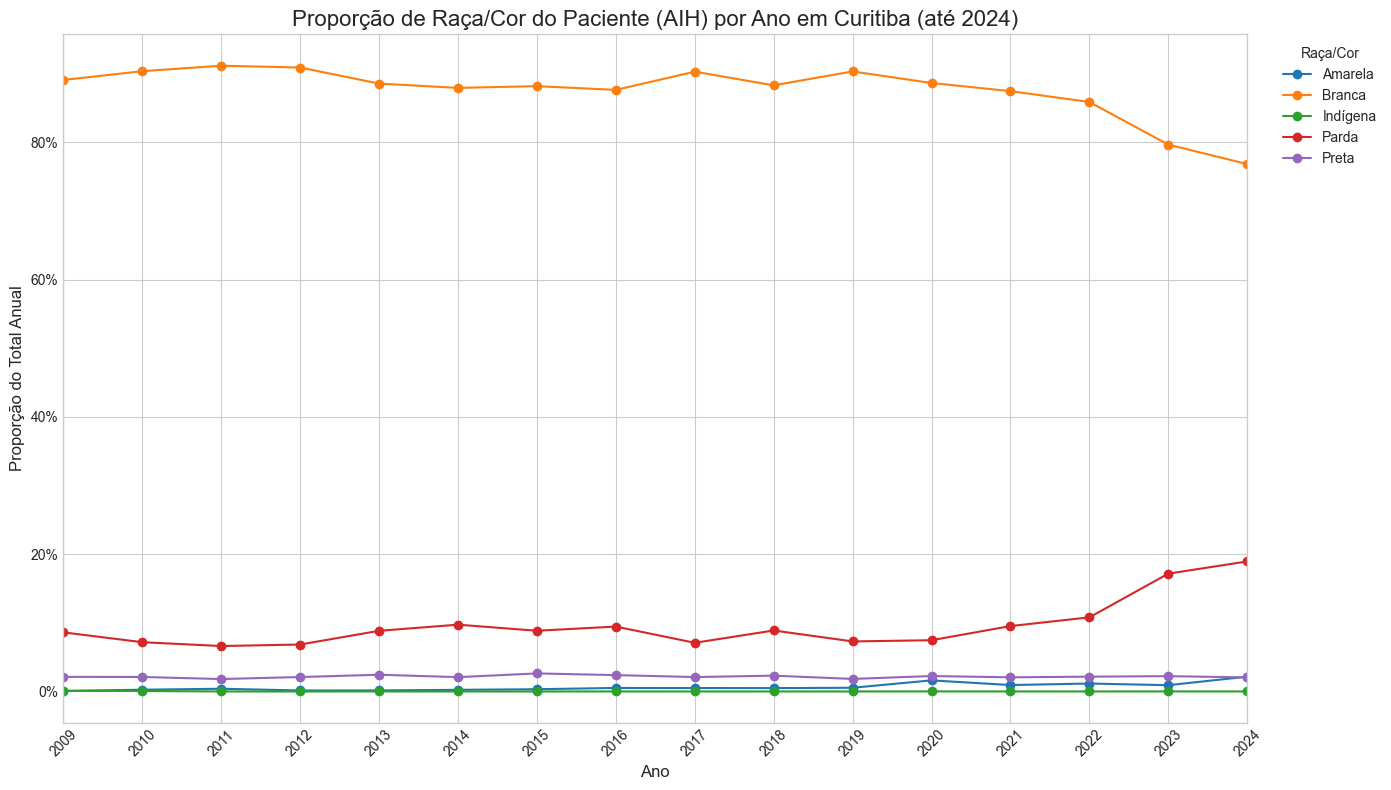

In [20]:
df_filtrado = df_filtrado[df_filtrado['raca_cor_paciente'] != 'Sem Informação']

    # 1. Cria uma tabela de contagem com anos nas linhas e raça/cor nas colunas
contagens = pd.crosstab(df_filtrado['ano'], df['raca_cor_paciente'])

    # 2. Divide cada linha pela soma da linha para obter a proporção
proporcoes = contagens.div(contagens.sum(axis=1), axis=0)

print("\n--- Proporção de cada Raça/Cor por Ano (incluindo 'Ignorado') ---")
print((proporcoes * 100).round(2))

    # --- GERAÇÃO DO GRÁFICO ---
print("\nGerando o gráfico de série temporal...")

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 8))

    # Plota automaticamente cada coluna (cada raça/cor) como uma linha separada
proporcoes.plot(kind='line', marker='o', ax=ax)

    # Formatação do gráfico

     # Define o título e os rótulos
ax.set_title('Proporção de Raça/Cor do Paciente (AIH) por Ano em Curitiba (até 2024)', fontsize=16)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Proporção do Total Anual', fontsize=12)
ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))

    # Garante que todos os anos sejam exibidos como ticks
ax.set_xticks(proporcoes.index)
plt.xticks(rotation=45)
    
    # (A SOLUÇÃO) Define o limite do eixo X para começar e terminar exatamente com os dados
ano_inicio = proporcoes.index.min()
ano_fim = proporcoes.index.max()
ax.set_xlim(ano_inicio, ano_fim)

    # Move a legenda para fora do gráfico
ax.legend(title='Raça/Cor', bbox_to_anchor=(1.02, 1), loc='upper left')
    
plt.tight_layout()

    # Salva o gráfico
caminho_saida_grafico = 'proporcao_raca_ate_2024_corrigido.png'
plt.savefig(caminho_saida_grafico)

print(f"\nGráfico salvo com sucesso como '{caminho_saida_grafico}'!")

Percebam que, aparentemente, a proporação racial (21%) passa a se aproximar aos dados do censo de 2022 do IBGE, que é de 24% da população que se autodeclara preta ou parda em Curitiba. Como a proporção entre as raças muda significativamente a partir de 2022 aquela aparência, sa primeira vista, que incluiam os dados "Sem Informação", de que a subnotificação era indiscriminada, fica visualmente invalidada.

In [23]:
df_filtrado['carater_internacao'].head()

0    Urgência
1     Eletivo
2    Urgência
3    Urgência
4    Urgência
Name: carater_internacao, dtype: object


--- Proporção de cada Raça/Cor por Ano (Eletivo) ---
raca_cor_paciente  Amarela  Branca  Indígena  Parda  Preta
ano                                                       
2009                  0.10   93.11      0.01   5.21   1.58
2010                  0.08   93.30      0.10   5.25   1.26
2011                  0.10   93.64      0.00   5.01   1.26
2012                  0.13   93.16      0.00   5.22   1.49
2013                  0.14   92.91      0.01   5.47   1.47
2014                  0.33   91.85      0.00   6.30   1.51
2015                  0.31   93.40      0.00   4.68   1.60
2016                  0.44   92.68      0.00   5.22   1.66
2017                  0.62   92.66      0.00   5.02   1.71
2018                  0.87   90.90      0.00   6.41   1.82
2019                  0.91   90.52      0.00   6.76   1.81
2020                  1.94   89.44      0.03   6.86   1.73
2021                  1.56   88.62      0.00   8.40   1.42
2022                  1.10   84.66      0.00  12.39   1.84
20

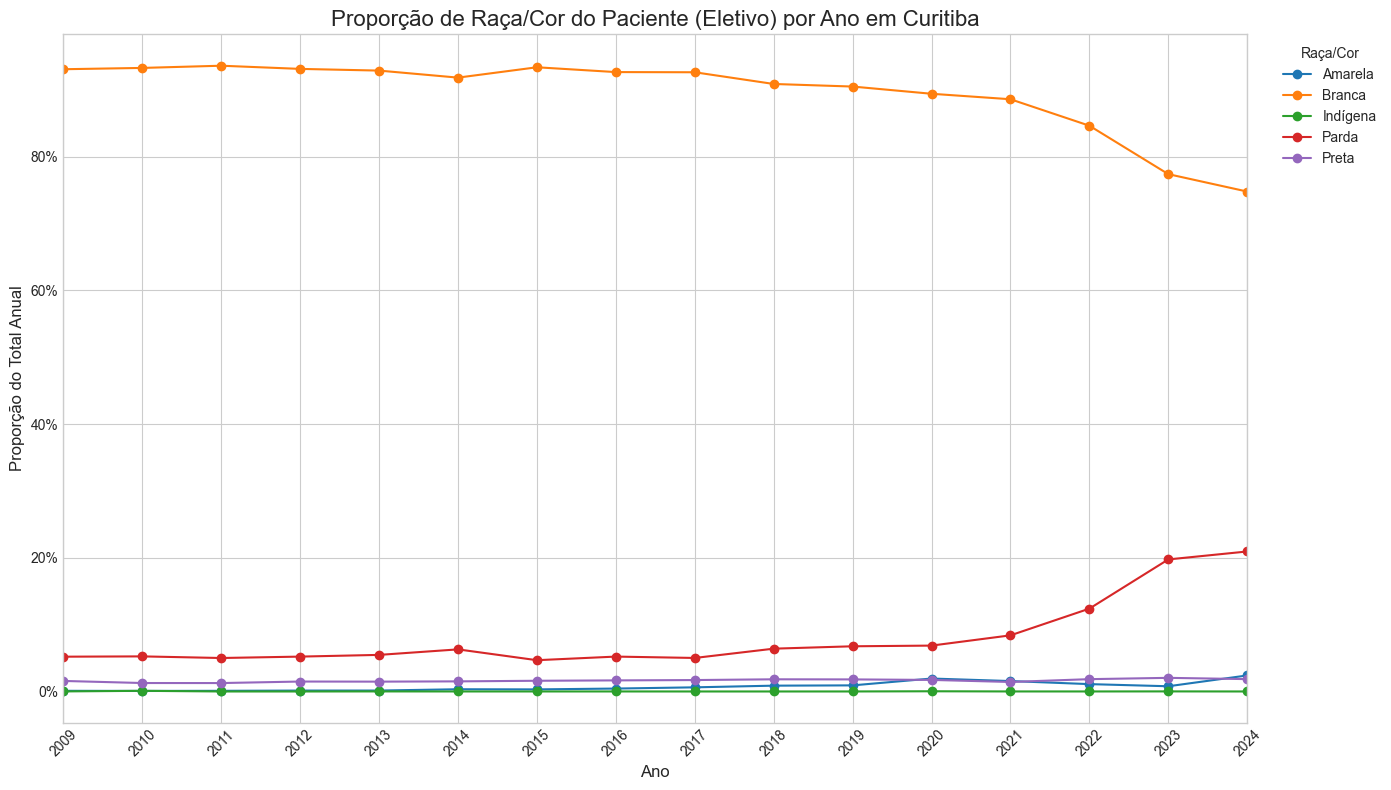

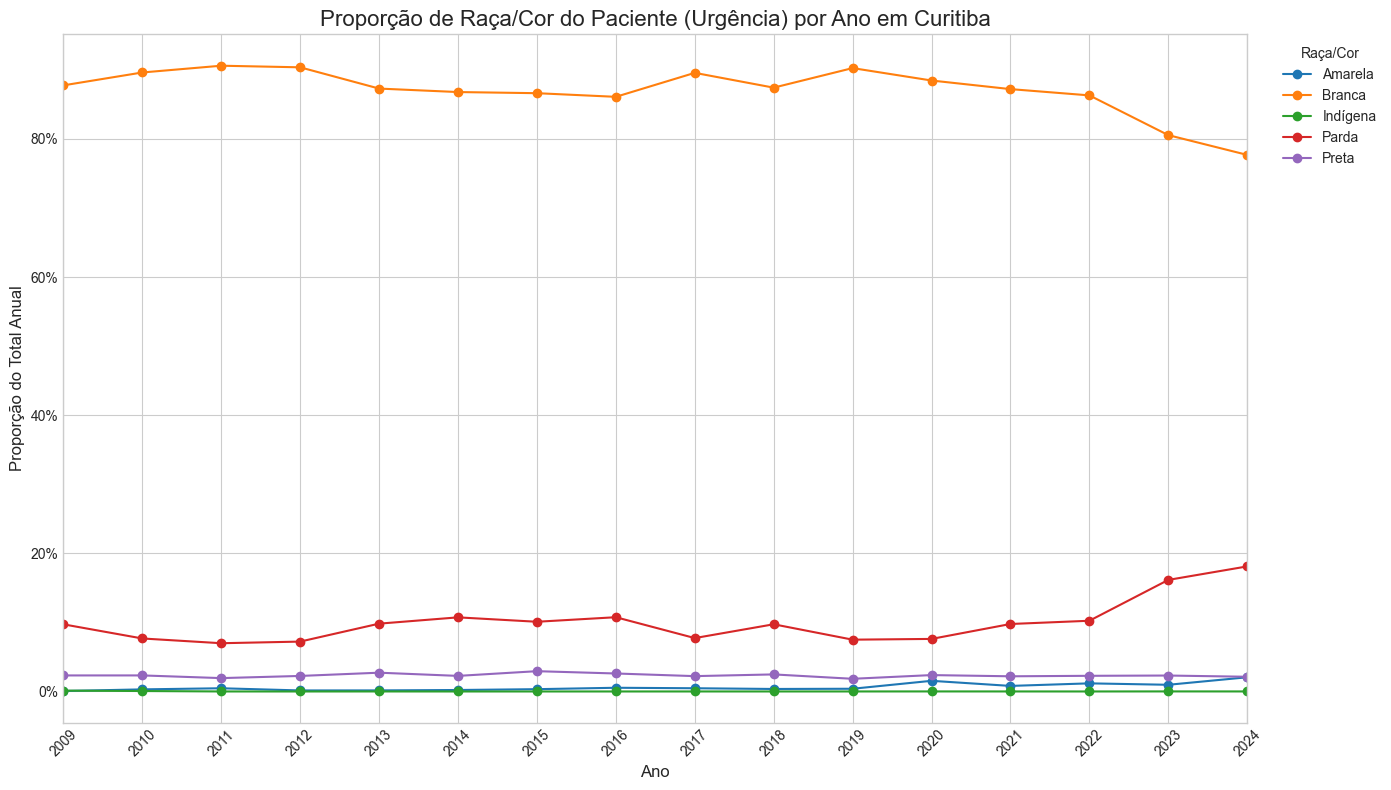

In [24]:

# Remove linhas sem ano ou raça
df_filtrado = df_filtrado.dropna(subset=['carater_internacao'])

for tipo in ['Eletivo', 'Urgência']:
    df_tipo = df_filtrado[df_filtrado['carater_internacao'] == tipo]
    contagens = pd.crosstab(df_tipo['ano'], df_tipo['raca_cor_paciente'])
    proporcoes = contagens.div(contagens.sum(axis=1), axis=0)
    
    print(f"\n--- Proporção de cada Raça/Cor por Ano ({tipo}) ---")
    print((proporcoes * 100).round(2))
    
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(14, 8))
    proporcoes.plot(kind='line', marker='o', ax=ax)
    ax.set_title(f'Proporção de Raça/Cor do Paciente ({tipo}) por Ano em Curitiba', fontsize=16)
    ax.set_xlabel('Ano', fontsize=12)
    ax.set_ylabel('Proporção do Total Anual', fontsize=12)
    ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))
    ax.set_xticks(proporcoes.index)
    plt.xticks(rotation=45)
    ano_inicio = proporcoes.index.min()
    ano_fim = proporcoes.index.max()
    ax.set_xlim(ano_inicio, ano_fim)
    ax.legend(title='Raça/Cor', bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.tight_layout()
    caminho_saida_grafico = f'proporcao_raca_{tipo.lower()}_por_ano.png'
    plt.savefig(caminho_saida_grafico)
    print(f"\nGráfico salvo com sucesso como '{caminho_saida_grafico}'!")

In [ ]:
df_filtrado['valor_aih'].isna().sum()

0    1088.12
1     365.77
2    1914.89
3    2038.45
4     317.81
Name: valor_aih, dtype: float64

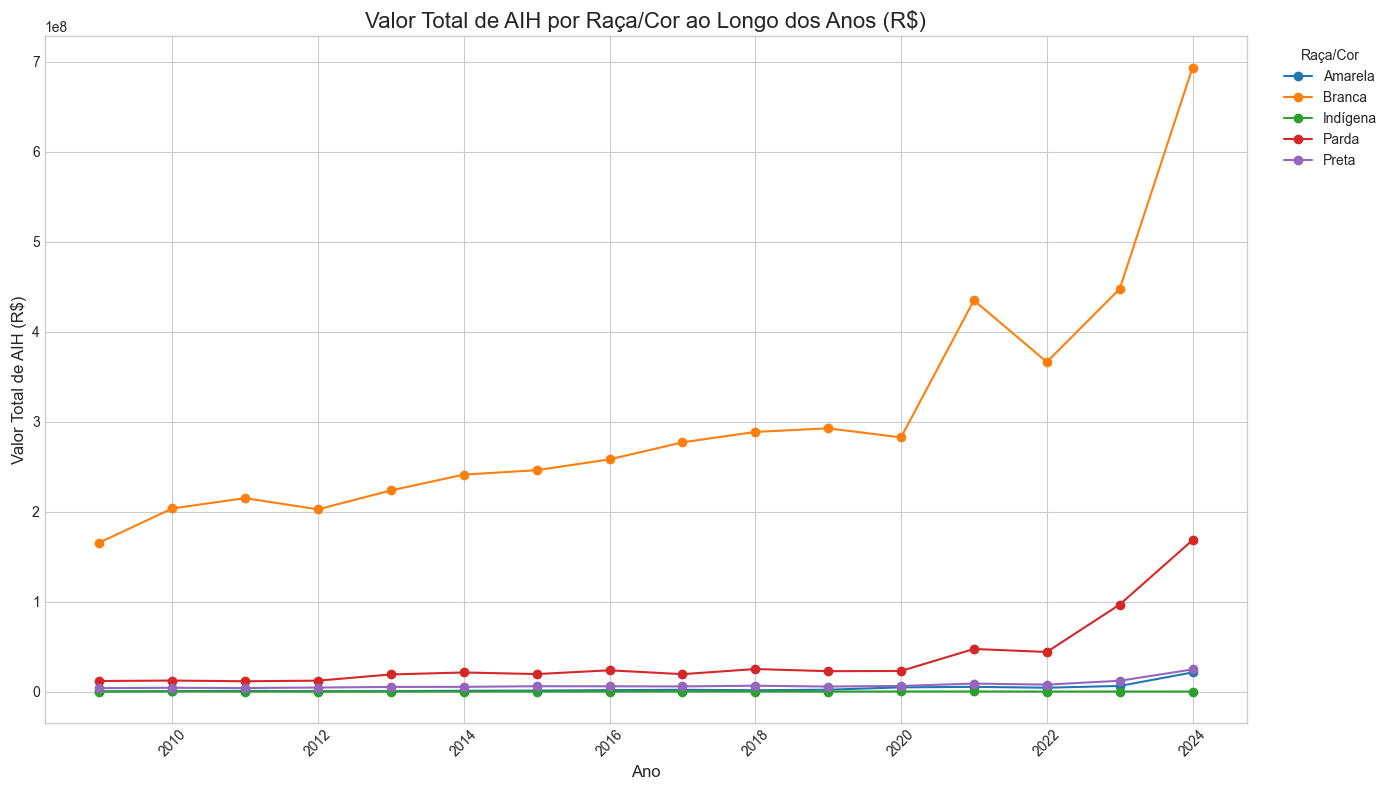

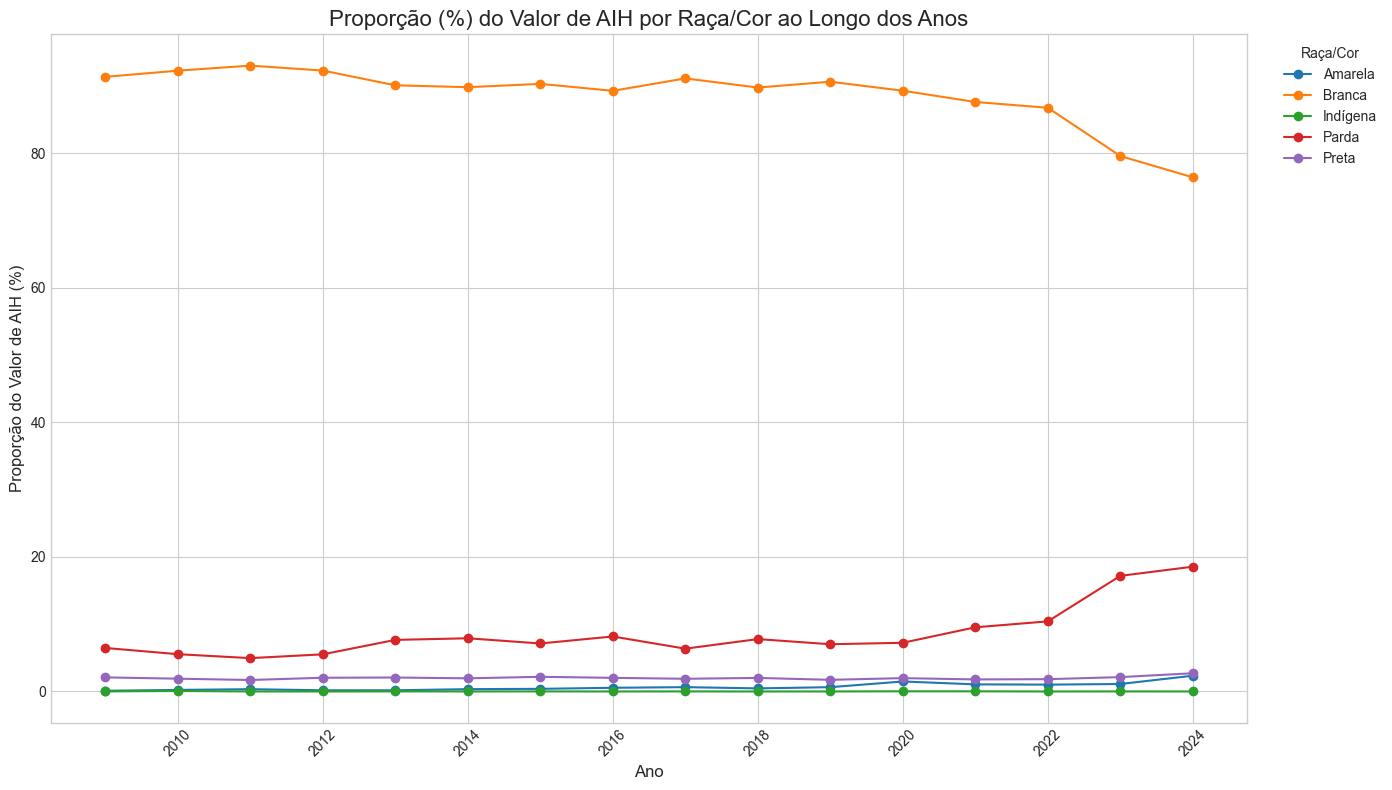

In [35]:
# 1. Valor total de AIH por raça ao longo dos anos
valor_total_ano_raca = df_filtrado.groupby(['ano', 'raca_cor_paciente'])['valor_aih'].sum().unstack(fill_value=0)

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 8))
valor_total_ano_raca.plot(ax=ax, marker='o')
ax.set_title('Valor Total de AIH por Raça/Cor ao Longo dos Anos (R$)', fontsize=16)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Valor Total de AIH (R$)', fontsize=12)
plt.xticks(rotation=45)
ax.legend(title='Raça/Cor', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.savefig('serie_valor_total_aih_por_raca.png')
plt.show()

# 2. Proporção do gasto anual de AIH por raça
proporcao_ano_raca = valor_total_ano_raca.div(valor_total_ano_raca.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(14, 8))
proporcao_ano_raca.plot(ax=ax, marker='o')
ax.set_title('Proporção (%) do Valor de AIH por Raça/Cor ao Longo dos Anos', fontsize=16)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Proporção do Valor de AIH (%)', fontsize=12)
plt.xticks(rotation=45)
ax.legend(title='Raça/Cor', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.savefig('serie_proporcao_valor_aih_por_raca.png')
plt.show()

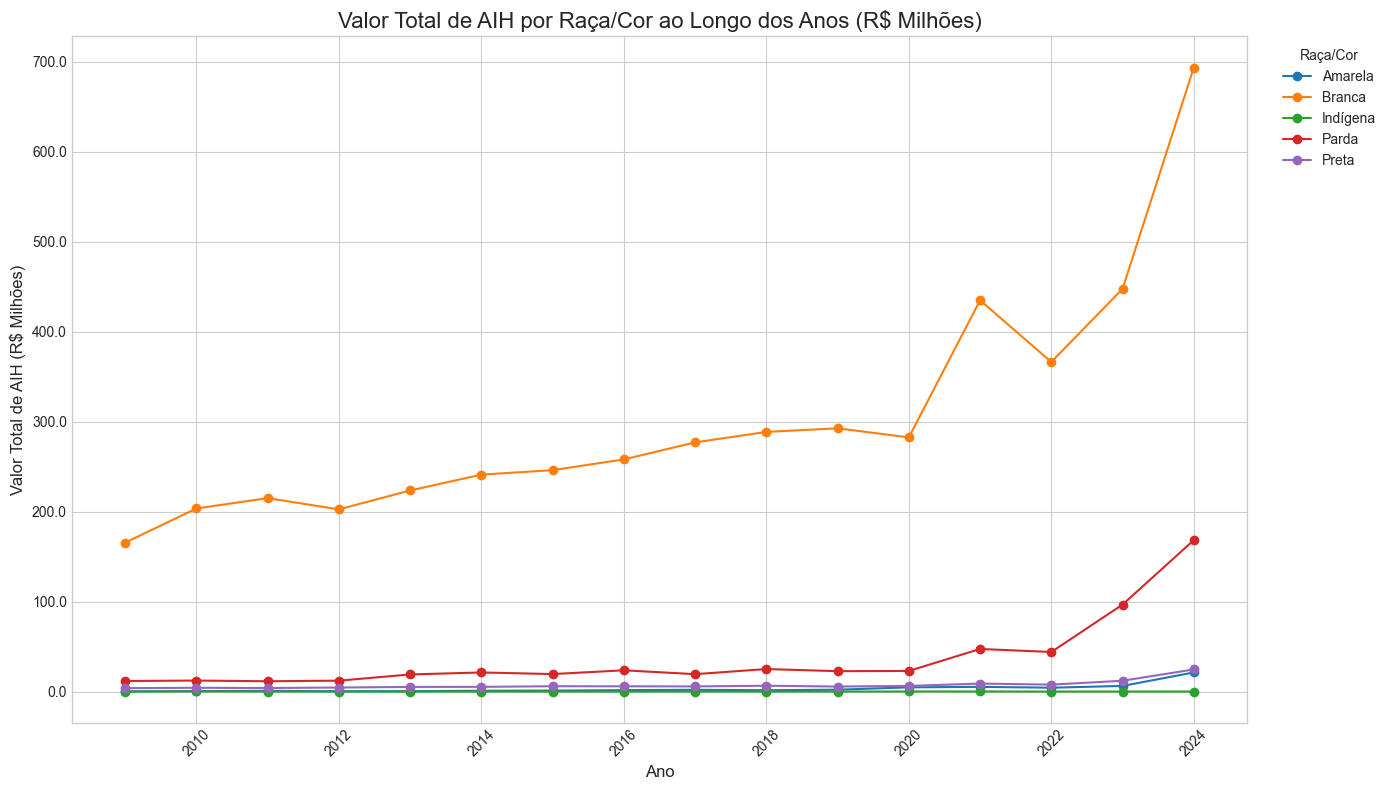

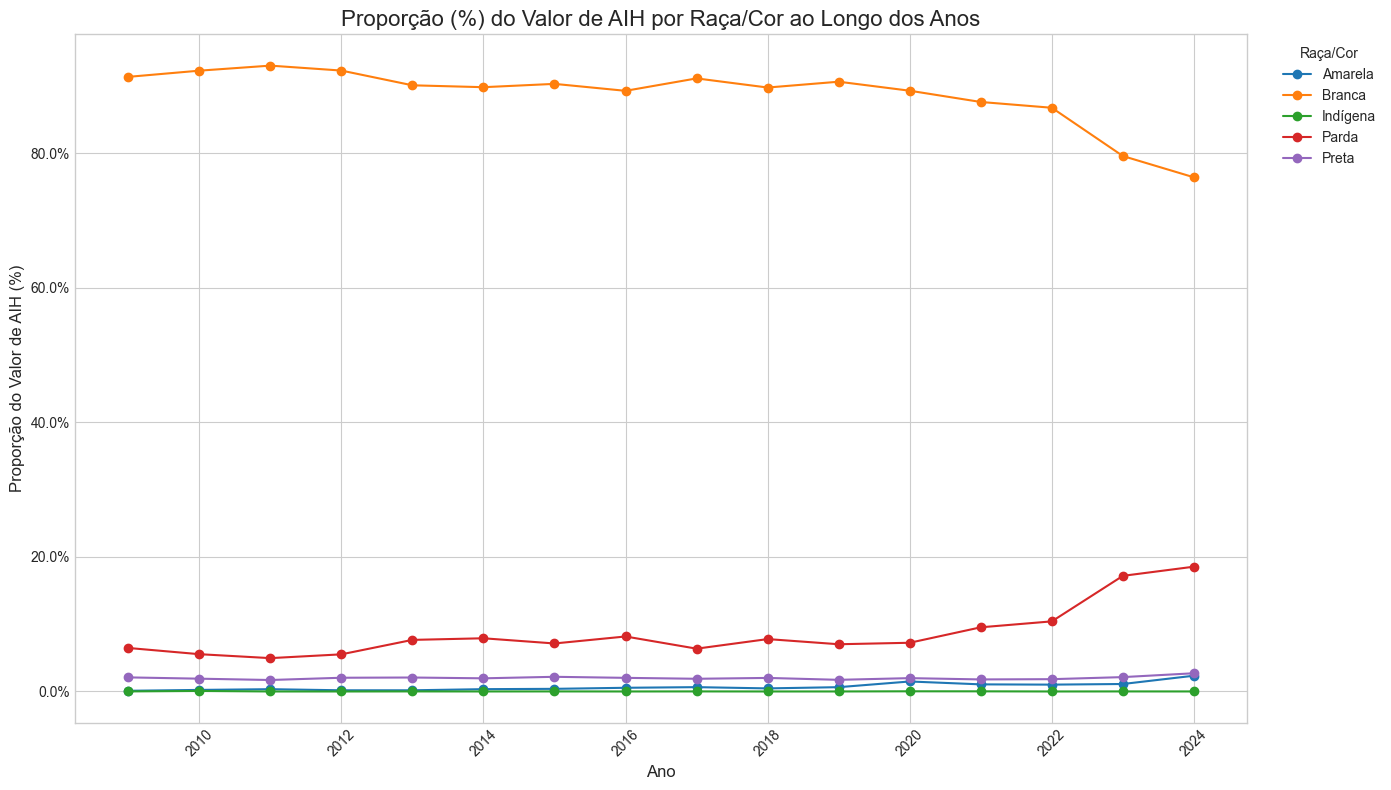

In [40]:
# 1. Valor total de AIH por raça ao longo dos anos (em milhões)
valor_total_ano_raca = df_filtrado.groupby(['ano', 'raca_cor_paciente'])['valor_aih'].sum().unstack(fill_value=0)

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 8))
valor_total_ano_raca.plot(ax=ax, marker='o')
ax.set_title('Valor Total de AIH por Raça/Cor ao Longo dos Anos (R$ Milhões)', fontsize=16)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Valor Total de AIH (R$ Milhões)', fontsize=12)

# Formata o eixo Y para mostrar valores em milhões
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{x/1e6:.1f}'))

plt.xticks(rotation=45)
ax.legend(title='Raça/Cor', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.savefig('serie_valor_total_aih_por_raca.png')
plt.show()

# 2. Proporção do gasto anual de AIH por raça
proporcao_ano_raca = valor_total_ano_raca.div(valor_total_ano_raca.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(14, 8))
proporcao_ano_raca.plot(ax=ax, marker='o')
ax.set_title('Proporção (%) do Valor de AIH por Raça/Cor ao Longo dos Anos', fontsize=16)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Proporção do Valor de AIH (%)', fontsize=12)

# Formata o eixo Y para mostrar percentuais com uma casa decimal
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{x:.1f}%'))

plt.xticks(rotation=45)
ax.legend(title='Raça/Cor', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.savefig('serie_proporcao_valor_aih_por_raca.png')
plt.show()

In [ ]:
caminho_do_arquivo = 'dataset_final_com_raca.csv'

# Colunas e valores que usaremos para o filtro e análise
coluna_carater = 'carater_internacao'
valor_filtro = 'Eletivo'
coluna_raca = 'raca_cor_descrita'

try:
    # Carrega o DataFrame
    df = pd.read_csv(caminho_do_arquivo, low_memory=False)
    print("Arquivo carregado com sucesso!")

    # --- PASSO 1: FILTRAR APENAS INTERNAÇÕES ELETIVAS ---
    # Usamos .copy() para evitar avisos de SettingWithCopyWarning
    df_eletivas = df[df[coluna_carater] == valor_filtro].copy()
    
    print(f"\nDados filtrados para manter apenas as {len(df_eletivas)} internações eletivas.")

    # --- PREPARAÇÃO DOS DADOS FILTRADOS ---
    # Remove as linhas onde 'ano' ou a coluna de raça/cor são nulos
    df_eletivas_filtrado = df_eletivas.dropna(subset=['ano', coluna_raca])
    df_eletivas_filtrado['ano'] = df_eletivas_filtrado['ano'].astype(int)
    
    # --- CÁLCULO DAS PROPORÇÕES (SOBRE OS DADOS ELETIVOS) ---
    
    # 1. Cria uma tabela de contagem com anos nas linhas e raça/cor nas colunas
    contagens = pd.crosstab(df_eletivas_filtrado['ano'], df_eletivas_filtrado[coluna_raca])

    # 2. Divide cada linha pela soma da linha para obter a proporção
    proporcoes = contagens.div(contagens.sum(axis=1), axis=0)

    print(f"\n--- Proporção de cada Raça/Cor por Ano (Apenas em Internações Eletivas) ---")
    print((proporcoes * 100).round(2))

    # --- GERAÇÃO DO GRÁFICO ---
    print("\nGerando o gráfico de série temporal...")

    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(14, 8))

    # Plota os dados de proporção
    proporcoes.plot(kind='line', marker='o', ax=ax)

    # Formatação do gráfico
    ax.set_title(f'Proporção de Raça/Cor nas Internações Eletivas por Ano', fontsize=16)
    ax.set_xlabel('Ano', fontsize=12)
    ax.set_ylabel('Proporção do Total de Internações Eletivas', fontsize=12)
    
    # Formata o eixo Y para mostrar percentuais
    ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))
    
    # Garante que os anos no eixo X sejam números inteiros
    ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
    plt.xticks(rotation=45)

    # Move a legenda para fora do gráfico
    ax.legend(title='Raça/Cor', bbox_to_anchor=(1.02, 1), loc='upper left')
    
    plt.tight_layout()

    # Salva o gráfico
    caminho_saida_grafico = 'proporcao_raca_eletivas_por_ano.png'
    plt.savefig(caminho_saida_grafico)

    print(f"\nGráfico salvo com sucesso como '{caminho_saida_grafico}'!")

except FileNotFoundError:
    print(f"ERRO: O arquivo '{caminho_do_arquivo}' não foi encontrado.")
except KeyError as e:
    print(f"ERRO: A coluna {e} não foi encontrada. Verifique se o nome da coluna está correto no seu arquivo.")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")

In [54]:
df_filtrado['quantidade_dias'].value_counts()

quantidade_dias
1      687341
2      363948
3      240783
31     219421
4      144424
        ...  
302         1
184         1
108         1
214         1
131         1
Name: count, Length: 150, dtype: int64

Dados preparados: 2622591 registros para análise


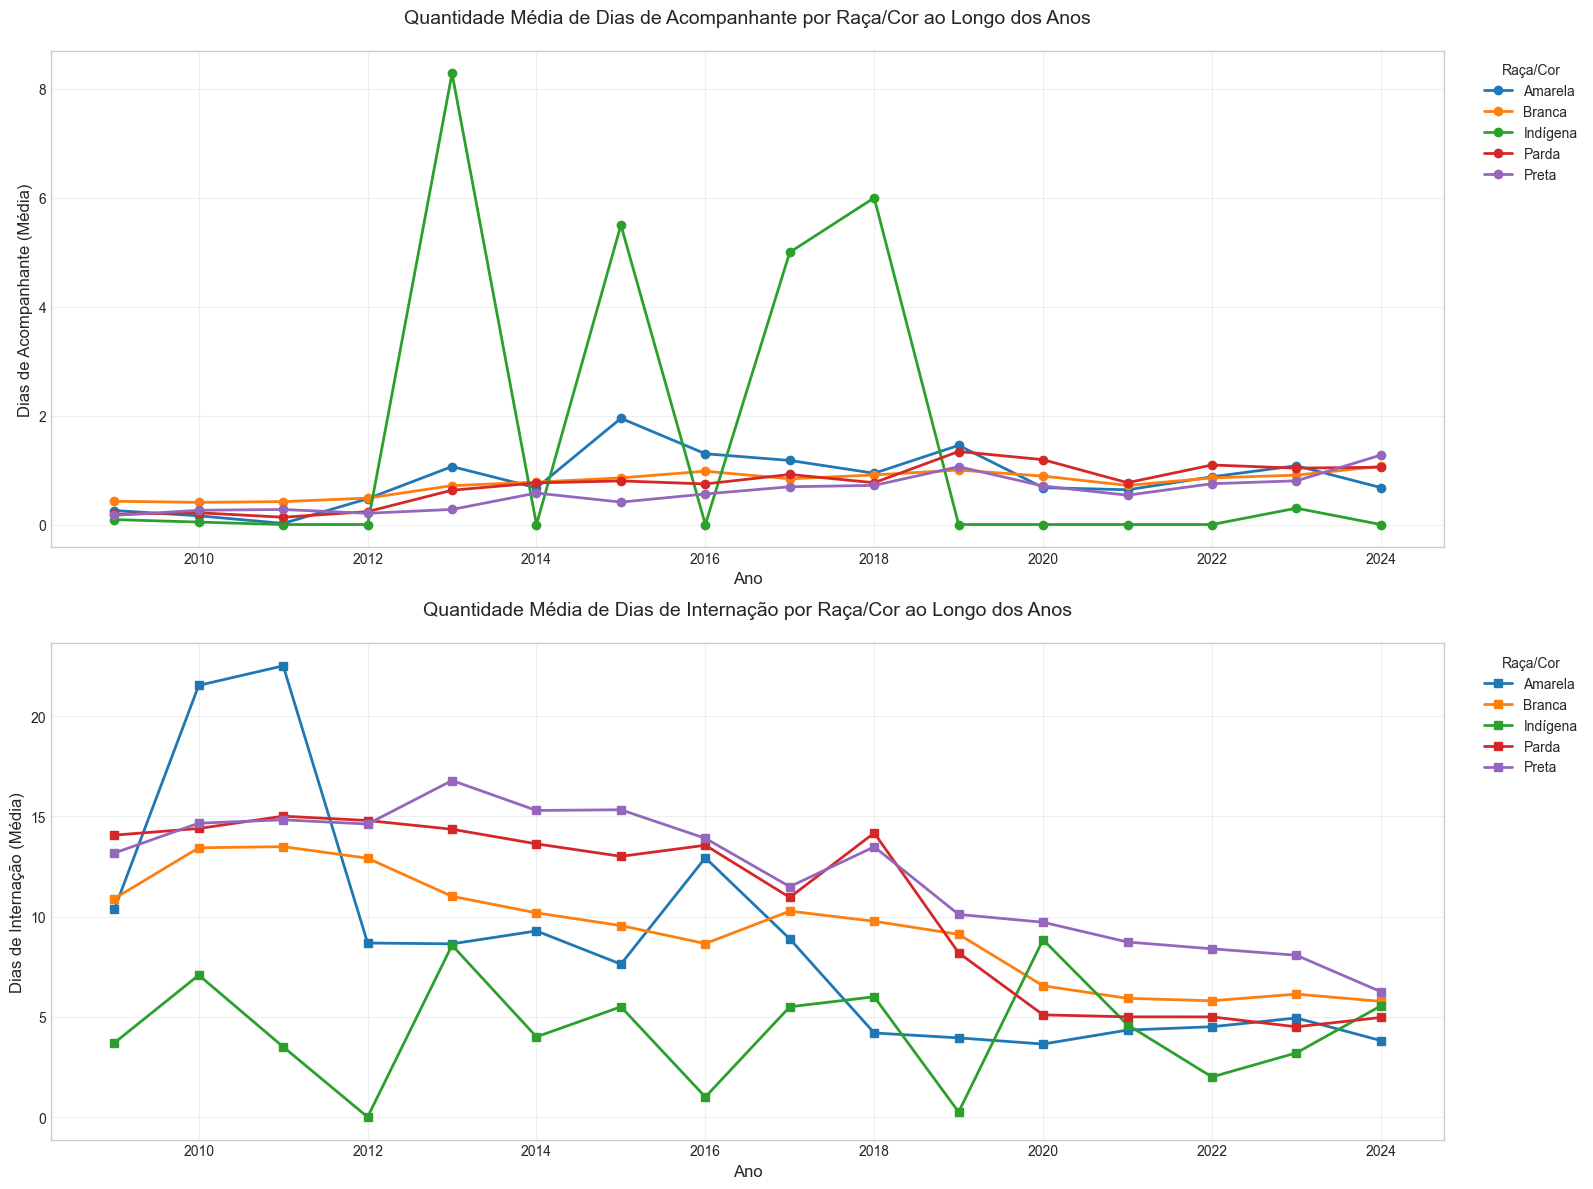


--- Estatísticas Resumo ---
Branca:
  Média dias acompanhante: 0.78
  Média dias internação: 9.16
  Razão acompanhante/internação: 0.086

Parda:
  Média dias acompanhante: 0.84
  Média dias internação: 9.01
  Razão acompanhante/internação: 0.093

Preta:
  Média dias acompanhante: 0.63
  Média dias internação: 11.77
  Razão acompanhante/internação: 0.054

Amarela:
  Média dias acompanhante: 0.82
  Média dias internação: 5.86
  Razão acompanhante/internação: 0.140

Indígena:
  Média dias acompanhante: 0.38
  Média dias internação: 5.24
  Razão acompanhante/internação: 0.072



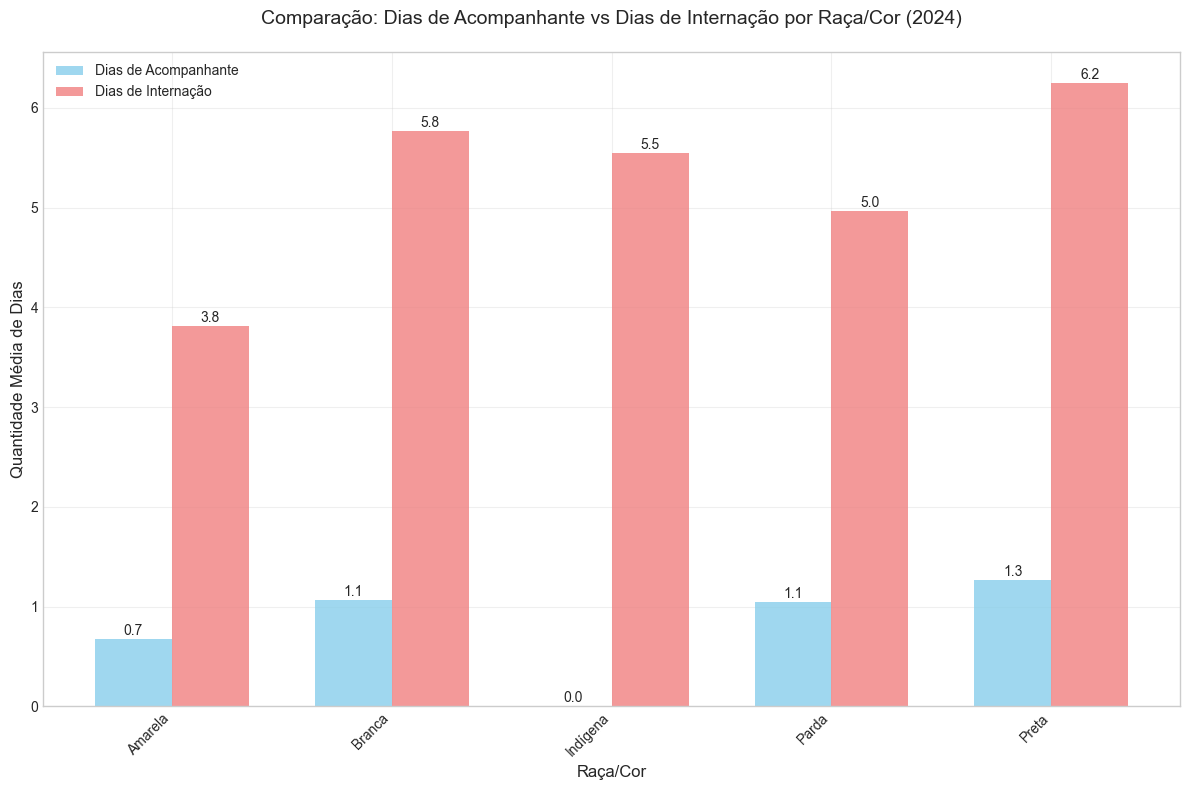


Gráficos salvos com sucesso!
- comparacao_dias_acompanhante_internacao_por_raca.png
- barras_comparacao_dias_raca_2024.png


In [55]:
# Análise da quantidade de dias de acompanhante por raça ao longo dos anos
import numpy as np

# Prepara os dados removendo valores nulos
df_analise = df_filtrado.dropna(subset=['ano', 'raca_cor_paciente', 'quantidade_dias_acompanhate', 'quantidade_dias']).copy()
df_analise['ano'] = df_analise['ano'].astype(int)

# Remove valores extremos que podem ser outliers
df_analise = df_analise[
    (df_analise['quantidade_dias_acompanhate'] <= 365) & 
    (df_analise['quantidade_dias'] <= 365)
]

print(f"Dados preparados: {len(df_analise)} registros para análise")

# 1. Cálculo das médias anuais por raça
medias_acompanhante = df_analise.groupby(['ano', 'raca_cor_paciente'])['quantidade_dias_acompanhate'].mean().unstack(fill_value=0)
medias_internacao = df_analise.groupby(['ano', 'raca_cor_paciente'])['quantidade_dias'].mean().unstack(fill_value=0)

# 2. Criação de subplots para comparação
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Gráfico 1: Quantidade média de dias de acompanhante
medias_acompanhante.plot(ax=ax1, marker='o', linewidth=2)
ax1.set_title('Quantidade Média de Dias de Acompanhante por Raça/Cor ao Longo dos Anos', fontsize=14, pad=20)
ax1.set_xlabel('Ano', fontsize=12)
ax1.set_ylabel('Dias de Acompanhante (Média)', fontsize=12)
ax1.legend(title='Raça/Cor', bbox_to_anchor=(1.02, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# Gráfico 2: Quantidade média de dias de internação
medias_internacao.plot(ax=ax2, marker='s', linewidth=2)
ax2.set_title('Quantidade Média de Dias de Internação por Raça/Cor ao Longo dos Anos', fontsize=14, pad=20)
ax2.set_xlabel('Ano', fontsize=12)
ax2.set_ylabel('Dias de Internação (Média)', fontsize=12)
ax2.legend(title='Raça/Cor', bbox_to_anchor=(1.02, 1), loc='upper left')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('comparacao_dias_acompanhante_internacao_por_raca.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Análise da razão entre dias de acompanhante e dias de internação
print("\n--- Estatísticas Resumo ---")
for raca in df_analise['raca_cor_paciente'].unique():
    if pd.notna(raca) and raca != 'Sem Informação':
        dados_raca = df_analise[df_analise['raca_cor_paciente'] == raca]
        media_acomp = dados_raca['quantidade_dias_acompanhate'].mean()
        media_intern = dados_raca['quantidade_dias'].mean()
        razao = media_acomp / media_intern if media_intern > 0 else 0
        
        print(f"{raca}:")
        print(f"  Média dias acompanhante: {media_acomp:.2f}")
        print(f"  Média dias internação: {media_intern:.2f}")
        print(f"  Razão acompanhante/internação: {razao:.3f}")
        print()

# 4. Gráfico de barras comparativo para o último ano disponível
ultimo_ano = df_analise['ano'].max()
dados_ultimo_ano = df_analise[df_analise['ano'] == ultimo_ano]

medias_ultimo_ano = dados_ultimo_ano.groupby('raca_cor_paciente').agg({
    'quantidade_dias_acompanhate': 'mean',
    'quantidade_dias': 'mean'
}).round(2)

# Remove 'Sem Informação' se existir
if 'Sem Informação' in medias_ultimo_ano.index:
    medias_ultimo_ano = medias_ultimo_ano.drop('Sem Informação')

fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(medias_ultimo_ano.index))
width = 0.35

bars1 = ax.bar(x - width/2, medias_ultimo_ano['quantidade_dias_acompanhate'], 
               width, label='Dias de Acompanhante', alpha=0.8, color='skyblue')
bars2 = ax.bar(x + width/2, medias_ultimo_ano['quantidade_dias'], 
               width, label='Dias de Internação', alpha=0.8, color='lightcoral')

ax.set_title(f'Comparação: Dias de Acompanhante vs Dias de Internação por Raça/Cor ({ultimo_ano})', 
             fontsize=14, pad=20)
ax.set_xlabel('Raça/Cor', fontsize=12)
ax.set_ylabel('Quantidade Média de Dias', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(medias_ultimo_ano.index, rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3)

# Adiciona valores nas barras
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{height:.1f}', ha='center', va='bottom', fontsize=10)

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{height:.1f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig(f'barras_comparacao_dias_raca_{ultimo_ano}.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nGráficos salvos com sucesso!")
print(f"- comparacao_dias_acompanhante_internacao_por_raca.png")
print(f"- barras_comparacao_dias_raca_{ultimo_ano}.png")

Dados preparados (a partir de nov/2022): 546284 registros para análise


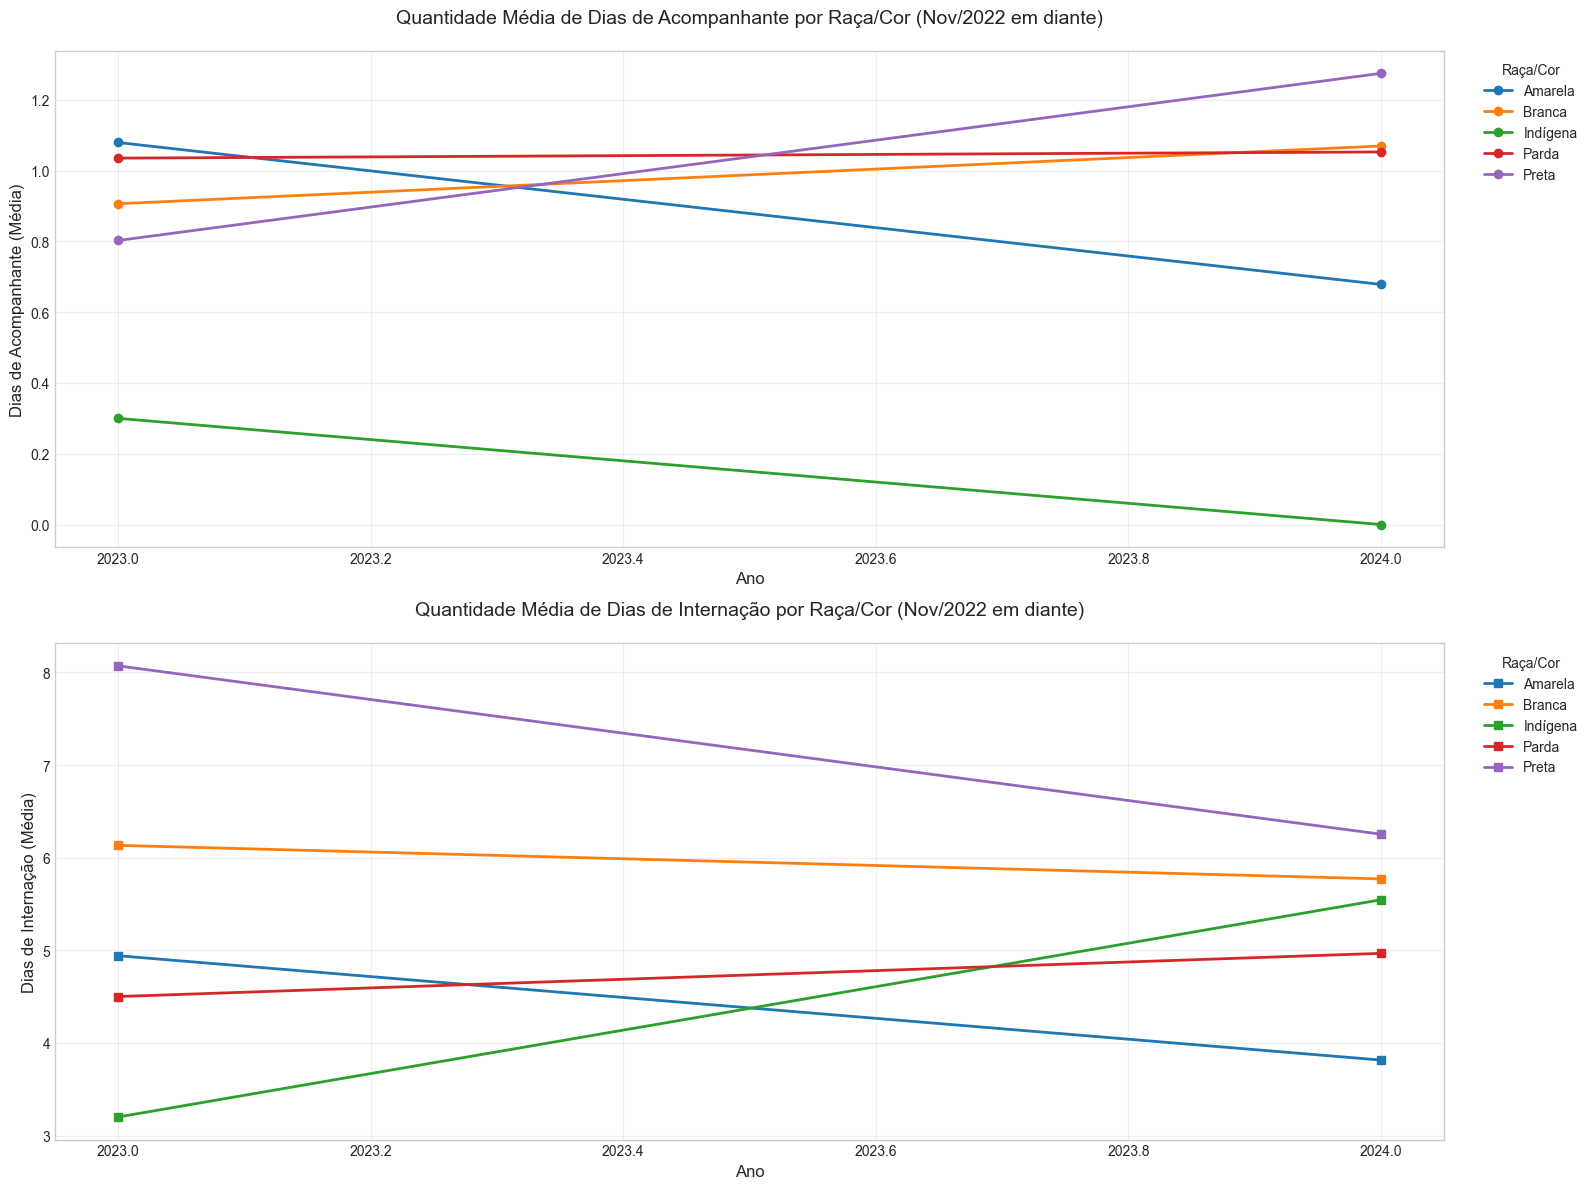


--- Estatísticas Resumo (Nov/2022 em diante) ---
Branca:
  Média dias acompanhante: 1.00
  Média dias internação: 5.92
  Razão acompanhante/internação: 0.170

Parda:
  Média dias acompanhante: 1.05
  Média dias internação: 4.80
  Razão acompanhante/internação: 0.218

Preta:
  Média dias acompanhante: 1.08
  Média dias internação: 7.00
  Razão acompanhante/internação: 0.154

Amarela:
  Média dias acompanhante: 0.76
  Média dias internação: 4.06
  Razão acompanhante/internação: 0.188

Indígena:
  Média dias acompanhante: 0.19
  Média dias internação: 4.03
  Razão acompanhante/internação: 0.048



C:\Users\trabalho\AppData\Local\Temp\ipykernel_23260\367791104.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(racas, rotation=45, ha='right')


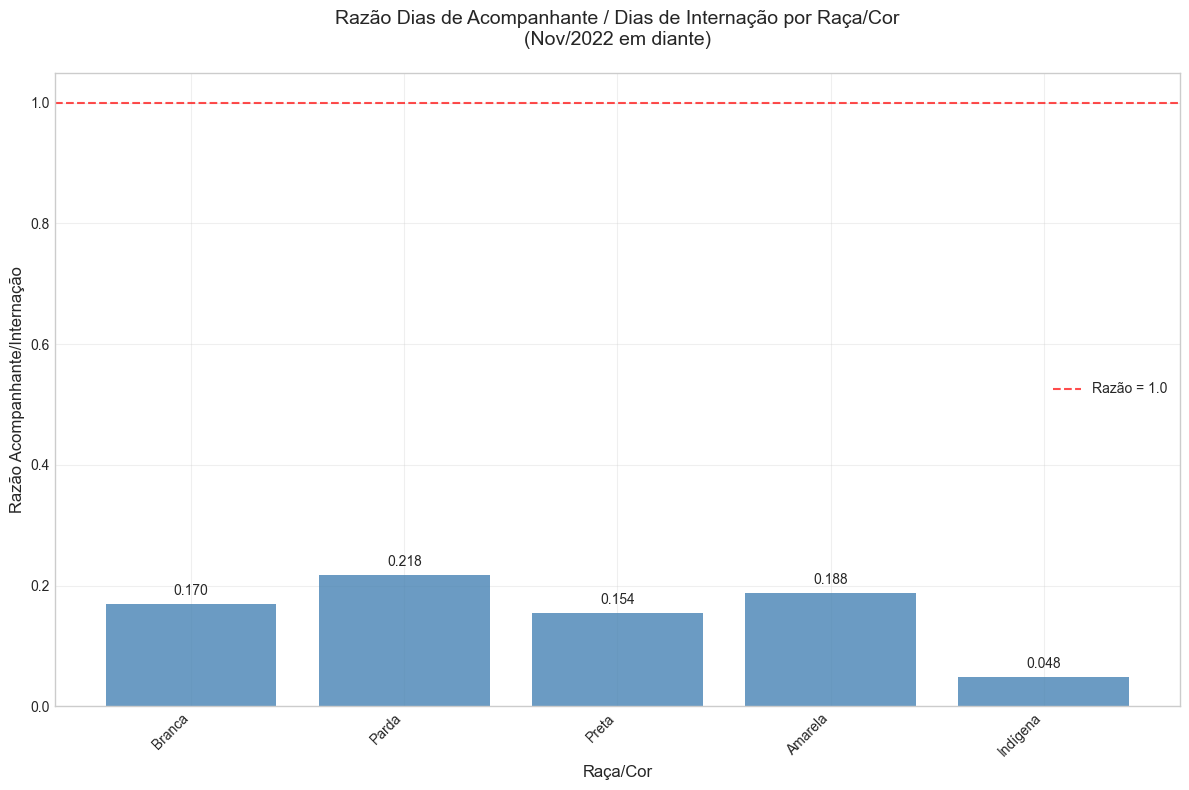


Gráficos salvos com sucesso!
- comparacao_dias_nov2022_por_raca.png
- razao_acompanhante_internacao_nov2022.png


In [56]:
# Análise da razão acompanhante/internação a partir de novembro de 2022
import numpy as np

# Prepara os dados removendo valores nulos
df_analise = df_filtrado.dropna(subset=['ano', 'raca_cor_paciente', 'quantidade_dias_acompanhate', 'quantidade_dias']).copy()
df_analise['ano'] = df_analise['ano'].astype(int)

# FILTRO: Apenas dados a partir de novembro de 2022
# Assumindo que você tem uma coluna de data ou mês, ou filtrando por ano >= 2022
df_analise_nov2022 = df_analise[
    (df_analise['ano'] >= 2022) |
    ((df_analise['ano'] == 2022) & (df_analise.get('mes', 11) >= 11))  # Se tiver coluna 'mes'
].copy()

# Se não tiver coluna de mês, use apenas ano >= 2023 para ser mais preciso
df_analise_nov2022 = df_analise[df_analise['ano'] >= 2023].copy()

# Remove valores extremos que podem ser outliers
df_analise_nov2022 = df_analise_nov2022[
    (df_analise_nov2022['quantidade_dias_acompanhate'] <= 365) & 
    (df_analise_nov2022['quantidade_dias'] <= 365)
]

print(f"Dados preparados (a partir de nov/2022): {len(df_analise_nov2022)} registros para análise")

# 1. Cálculo das médias anuais por raça (período filtrado)
medias_acompanhante_nov2022 = df_analise_nov2022.groupby(['ano', 'raca_cor_paciente'])['quantidade_dias_acompanhate'].mean().unstack(fill_value=0)
medias_internacao_nov2022 = df_analise_nov2022.groupby(['ano', 'raca_cor_paciente'])['quantidade_dias'].mean().unstack(fill_value=0)

# 2. Criação de gráfico específico para o período pós nov/2022
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Gráfico 1: Quantidade média de dias de acompanhante (nov/2022 em diante)
medias_acompanhante_nov2022.plot(ax=ax1, marker='o', linewidth=2)
ax1.set_title('Quantidade Média de Dias de Acompanhante por Raça/Cor (Nov/2022 em diante)', fontsize=14, pad=20)
ax1.set_xlabel('Ano', fontsize=12)
ax1.set_ylabel('Dias de Acompanhante (Média)', fontsize=12)
ax1.legend(title='Raça/Cor', bbox_to_anchor=(1.02, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# Gráfico 2: Quantidade média de dias de internação (nov/2022 em diante)
medias_internacao_nov2022.plot(ax=ax2, marker='s', linewidth=2)
ax2.set_title('Quantidade Média de Dias de Internação por Raça/Cor (Nov/2022 em diante)', fontsize=14, pad=20)
ax2.set_xlabel('Ano', fontsize=12)
ax2.set_ylabel('Dias de Internação (Média)', fontsize=12)
ax2.legend(title='Raça/Cor', bbox_to_anchor=(1.02, 1), loc='upper left')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('comparacao_dias_nov2022_por_raca.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Análise da razão entre dias de acompanhante e dias de internação (nov/2022 em diante)
print("\n--- Estatísticas Resumo (Nov/2022 em diante) ---")
for raca in df_analise_nov2022['raca_cor_paciente'].unique():
    if pd.notna(raca) and raca != 'Sem Informação':
        dados_raca = df_analise_nov2022[df_analise_nov2022['raca_cor_paciente'] == raca]
        media_acomp = dados_raca['quantidade_dias_acompanhate'].mean()
        media_intern = dados_raca['quantidade_dias'].mean()
        razao = media_acomp / media_intern if media_intern > 0 else 0
        
        print(f"{raca}:")
        print(f"  Média dias acompanhante: {media_acomp:.2f}")
        print(f"  Média dias internação: {media_intern:.2f}")
        print(f"  Razão acompanhante/internação: {razao:.3f}")
        print()

# 4. Gráfico de barras mostrando apenas a razão acompanhante/internação
razoes_por_raca = {}
for raca in df_analise_nov2022['raca_cor_paciente'].unique():
    if pd.notna(raca) and raca != 'Sem Informação':
        dados_raca = df_analise_nov2022[df_analise_nov2022['raca_cor_paciente'] == raca]
        media_acomp = dados_raca['quantidade_dias_acompanhate'].mean()
        media_intern = dados_raca['quantidade_dias'].mean()
        razao = media_acomp / media_intern if media_intern > 0 else 0
        razoes_por_raca[raca] = razao

# Gráfico de barras das razões
fig, ax = plt.subplots(figsize=(12, 8))
racas = list(razoes_por_raca.keys())
razoes = list(razoes_por_raca.values())

bars = ax.bar(racas, razoes, alpha=0.8, color='steelblue')
ax.set_title('Razão Dias de Acompanhante / Dias de Internação por Raça/Cor\n(Nov/2022 em diante)', 
             fontsize=14, pad=20)
ax.set_xlabel('Raça/Cor', fontsize=12)
ax.set_ylabel('Razão Acompanhante/Internação', fontsize=12)
ax.set_xticklabels(racas, rotation=45, ha='right')
ax.grid(True, alpha=0.3)

# Adiciona linha de referência (razão = 1.0)
ax.axhline(y=1.0, color='red', linestyle='--', alpha=0.7, label='Razão = 1.0')

# Adiciona valores nas barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{height:.3f}', ha='center', va='bottom', fontsize=10)

ax.legend()
plt.tight_layout()
plt.savefig('razao_acompanhante_internacao_nov2022.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nGráficos salvos com sucesso!")
print(f"- comparacao_dias_nov2022_por_raca.png")
print(f"- razao_acompanhante_internacao_nov2022.png")

Dados preparados (apenas obstétricos): 198484 registros para análise


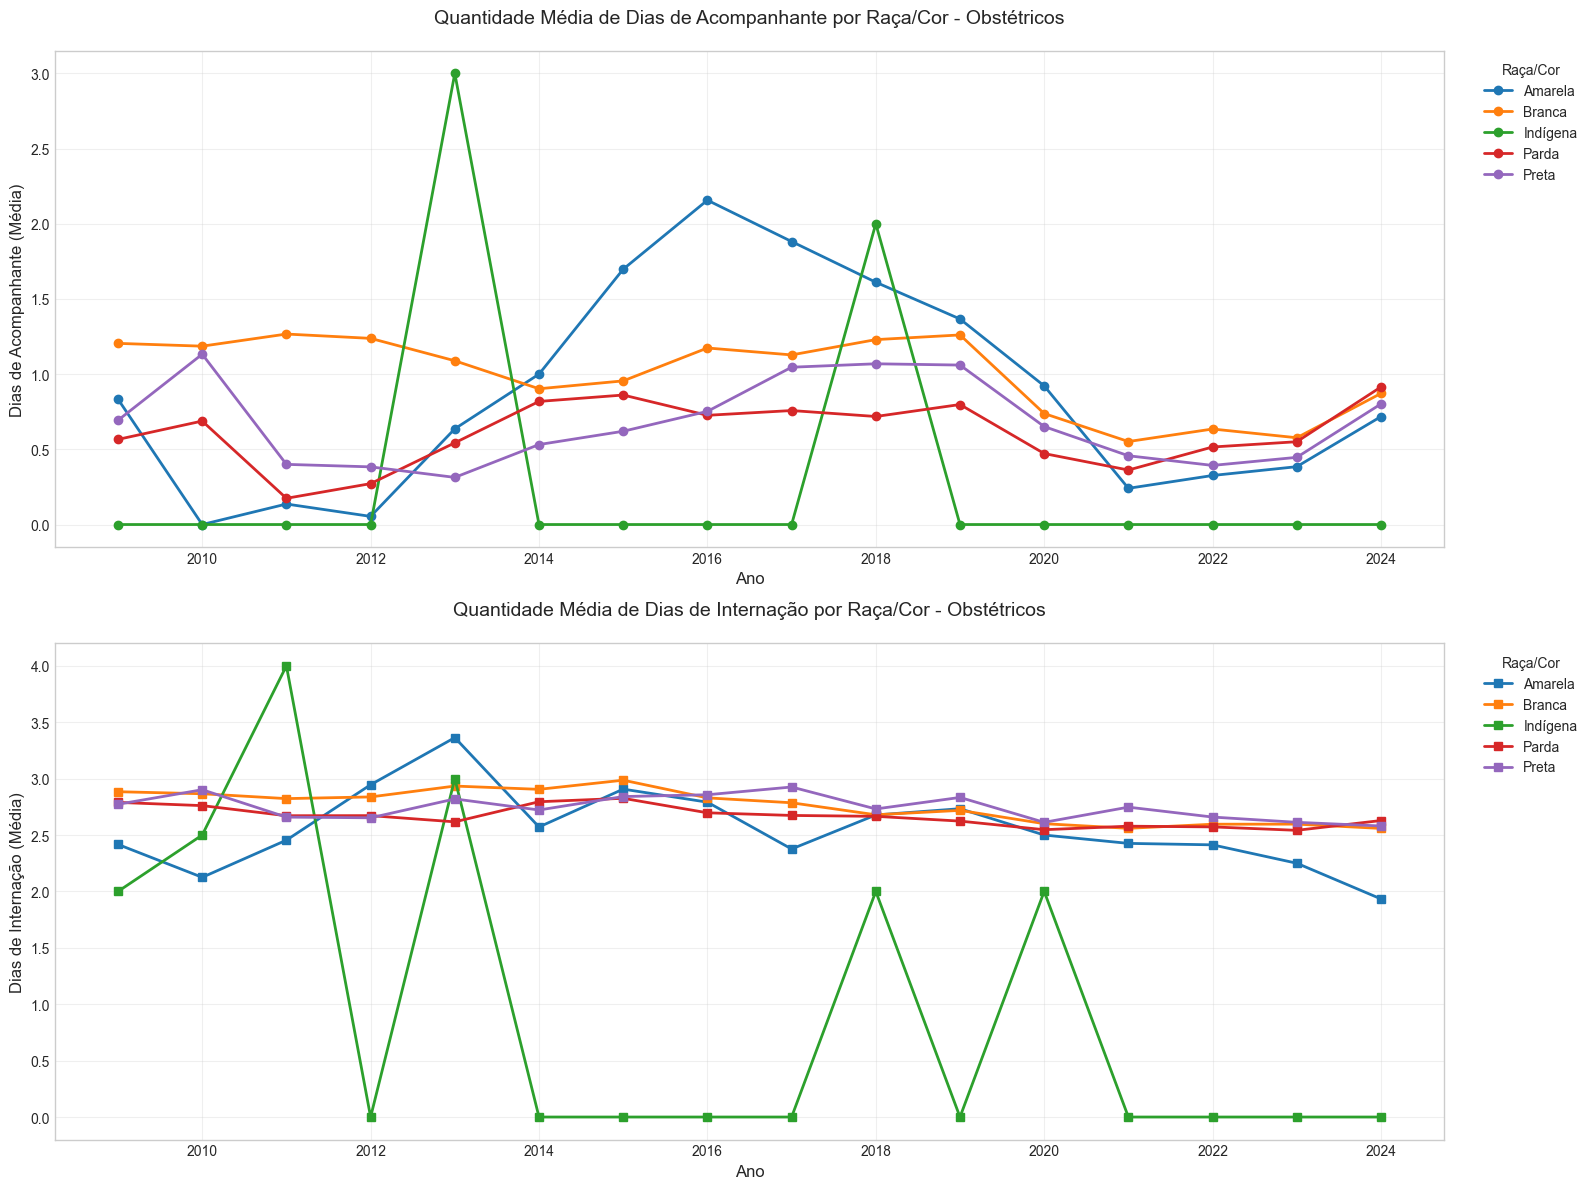


--- Estatísticas Resumo (Obstétricos) ---
Branca:
  Total de registros: 172429
  Média dias acompanhante: 1.03
  Média dias internação: 2.77
  Razão acompanhante/internação: 0.371

Parda:
  Total de registros: 20847
  Média dias acompanhante: 0.63
  Média dias internação: 2.66
  Razão acompanhante/internação: 0.237

Preta:
  Total de registros: 4176
  Média dias acompanhante: 0.71
  Média dias internação: 2.74
  Razão acompanhante/internação: 0.260

Amarela:
  Total de registros: 1017
  Média dias acompanhante: 1.08
  Média dias internação: 2.45
  Razão acompanhante/internação: 0.441

Indígena:
  Total de registros: 15
  Média dias acompanhante: 0.33
  Média dias internação: 2.53
  Razão acompanhante/internação: 0.132



C:\Users\trabalho\AppData\Local\Temp\ipykernel_23260\1276810533.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(racas, rotation=45, ha='right')


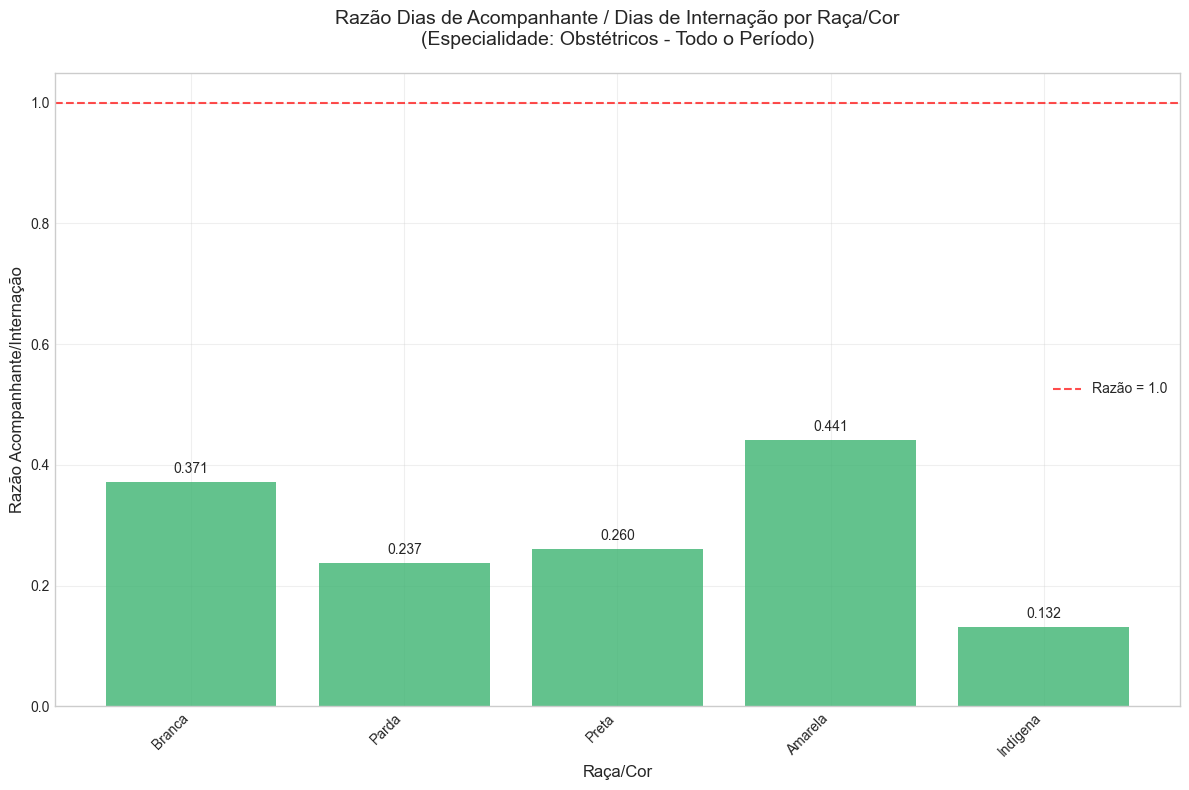

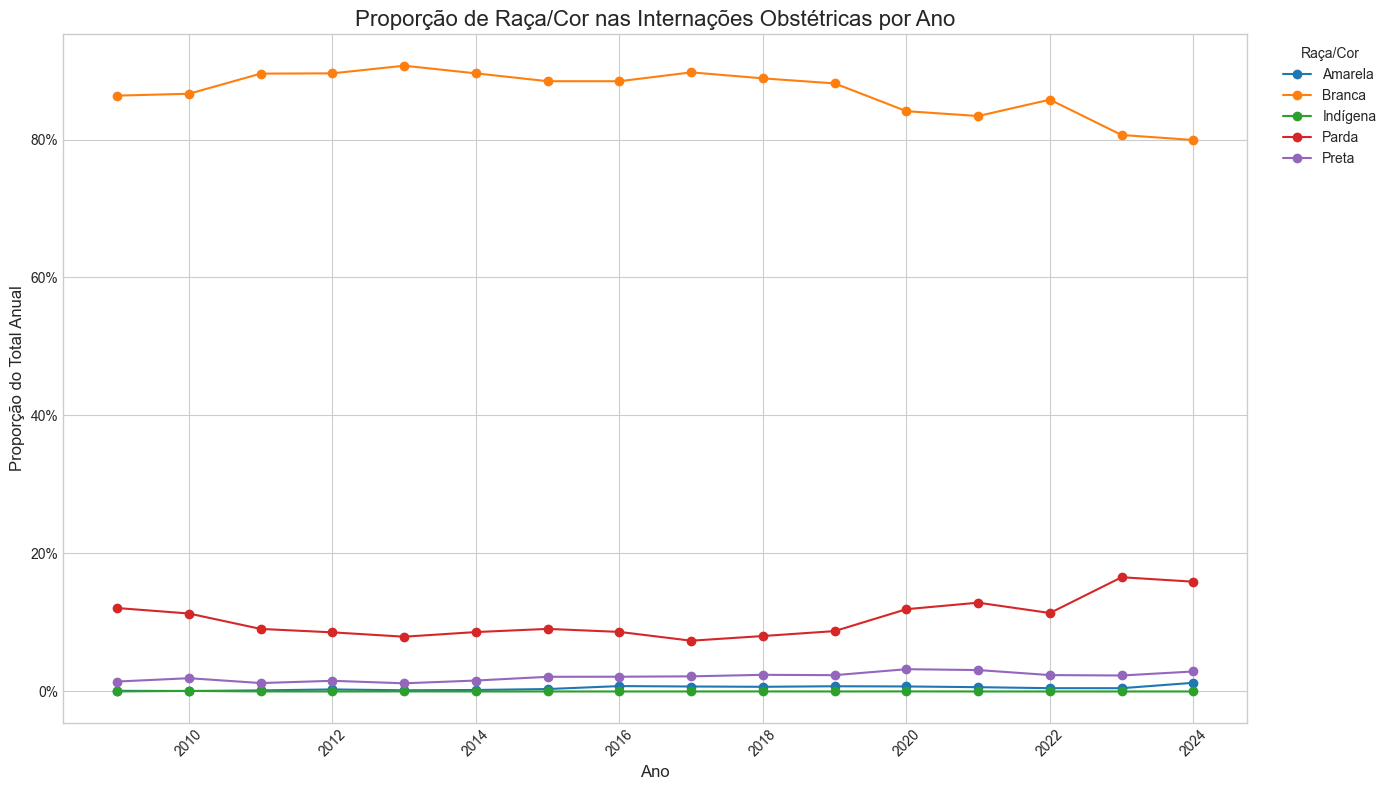


Gráficos salvos com sucesso!
- comparacao_dias_acompanhante_obstetricia_por_raca.png
- razao_acompanhante_internacao_obstetricia.png
- proporcao_raca_obstetricia_por_ano.png


In [61]:
# Análise da quantidade de dias de acompanhante por raça para especialidade obstétrica
import numpy as np

# Prepara os dados removendo valores nulos e filtrando apenas obstétricos
df_analise = df_filtrado.dropna(subset=['ano', 'raca_cor_paciente', 'quantidade_dias_acompanhate', 'quantidade_dias', 'especialidade_leito']).copy()
df_analise = df_analise[df_analise['especialidade_leito'] == '02-Obstétricos']
df_analise['ano'] = df_analise['ano'].astype(int)

# Remove valores extremos que podem ser outliers
df_analise = df_analise[
    (df_analise['quantidade_dias_acompanhate'] <= 365) & 
    (df_analise['quantidade_dias'] <= 365)
]

print(f"Dados preparados (apenas obstétricos): {len(df_analise)} registros para análise")

# 1. Cálculo das médias anuais por raça
medias_acompanhante = df_analise.groupby(['ano', 'raca_cor_paciente'])['quantidade_dias_acompanhate'].mean().unstack(fill_value=0)
medias_internacao = df_analise.groupby(['ano', 'raca_cor_paciente'])['quantidade_dias'].mean().unstack(fill_value=0)

# 2. Criação de subplots para comparação
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Gráfico 1: Quantidade média de dias de acompanhante
medias_acompanhante.plot(ax=ax1, marker='o', linewidth=2)
ax1.set_title('Quantidade Média de Dias de Acompanhante por Raça/Cor - Obstétricos', fontsize=14, pad=20)
ax1.set_xlabel('Ano', fontsize=12)
ax1.set_ylabel('Dias de Acompanhante (Média)', fontsize=12)
ax1.legend(title='Raça/Cor', bbox_to_anchor=(1.02, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# Gráfico 2: Quantidade média de dias de internação
medias_internacao.plot(ax=ax2, marker='s', linewidth=2)
ax2.set_title('Quantidade Média de Dias de Internação por Raça/Cor - Obstétricos', fontsize=14, pad=20)
ax2.set_xlabel('Ano', fontsize=12)
ax2.set_ylabel('Dias de Internação (Média)', fontsize=12)
ax2.legend(title='Raça/Cor', bbox_to_anchor=(1.02, 1), loc='upper left')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('comparacao_dias_acompanhante_obstetricia_por_raca.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Análise da razão entre dias de acompanhante e dias de internação
print("\n--- Estatísticas Resumo (Obstétricos) ---")
for raca in df_analise['raca_cor_paciente'].unique():
    if pd.notna(raca) and raca != 'Sem Informação':
        dados_raca = df_analise[df_analise['raca_cor_paciente'] == raca]
        media_acomp = dados_raca['quantidade_dias_acompanhate'].mean()
        media_intern = dados_raca['quantidade_dias'].mean()
        razao = media_acomp / media_intern if media_intern > 0 else 0
        total_registros = len(dados_raca)
        
        print(f"{raca}:")
        print(f"  Total de registros: {total_registros}")
        print(f"  Média dias acompanhante: {media_acomp:.2f}")
        print(f"  Média dias internação: {media_intern:.2f}")
        print(f"  Razão acompanhante/internação: {razao:.3f}")
        print()

# 4. Gráfico de barras da razão acompanhante/internação para todo o período
razoes_por_raca = {}
for raca in df_analise['raca_cor_paciente'].unique():
    if pd.notna(raca) and raca != 'Sem Informação':
        dados_raca = df_analise[df_analise['raca_cor_paciente'] == raca]
        media_acomp = dados_raca['quantidade_dias_acompanhate'].mean()
        media_intern = dados_raca['quantidade_dias'].mean()
        razao = media_acomp / media_intern if media_intern > 0 else 0
        razoes_por_raca[raca] = razao

# Gráfico de barras das razões
fig, ax = plt.subplots(figsize=(12, 8))
racas = list(razoes_por_raca.keys())
razoes = list(razoes_por_raca.values())

bars = ax.bar(racas, razoes, alpha=0.8, color='mediumseagreen')
ax.set_title('Razão Dias de Acompanhante / Dias de Internação por Raça/Cor\n(Especialidade: Obstétricos - Todo o Período)', 
             fontsize=14, pad=20)
ax.set_xlabel('Raça/Cor', fontsize=12)
ax.set_ylabel('Razão Acompanhante/Internação', fontsize=12)
ax.set_xticklabels(racas, rotation=45, ha='right')
ax.grid(True, alpha=0.3)

# Adiciona linha de referência (razão = 1.0)
ax.axhline(y=1.0, color='red', linestyle='--', alpha=0.7, label='Razão = 1.0')

# Adiciona valores nas barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{height:.3f}', ha='center', va='bottom', fontsize=10)

ax.legend()
plt.tight_layout()
plt.savefig('razao_acompanhante_internacao_obstetricia.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Proporção de internações por raça na obstetrícia ao longo dos anos
contagens_obs = pd.crosstab(df_analise['ano'], df_analise['raca_cor_paciente'])
proporcoes_obs = contagens_obs.div(contagens_obs.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(14, 8))
proporcoes_obs.plot(kind='line', marker='o', ax=ax)
ax.set_title('Proporção de Raça/Cor nas Internações Obstétricas por Ano', fontsize=16)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Proporção do Total Anual', fontsize=12)
ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))
ax.legend(title='Raça/Cor', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('proporcao_raca_obstetricia_por_ano.png')
plt.show()

print(f"\nGráficos salvos com sucesso!")
print(f"- comparacao_dias_acompanhante_obstetricia_por_raca.png")
print(f"- razao_acompanhante_internacao_obstetricia.png")
print(f"- proporcao_raca_obstetricia_por_ano.png")

Dados preparados (apenas obstétricos 2023-2024): 30064 registros para análise


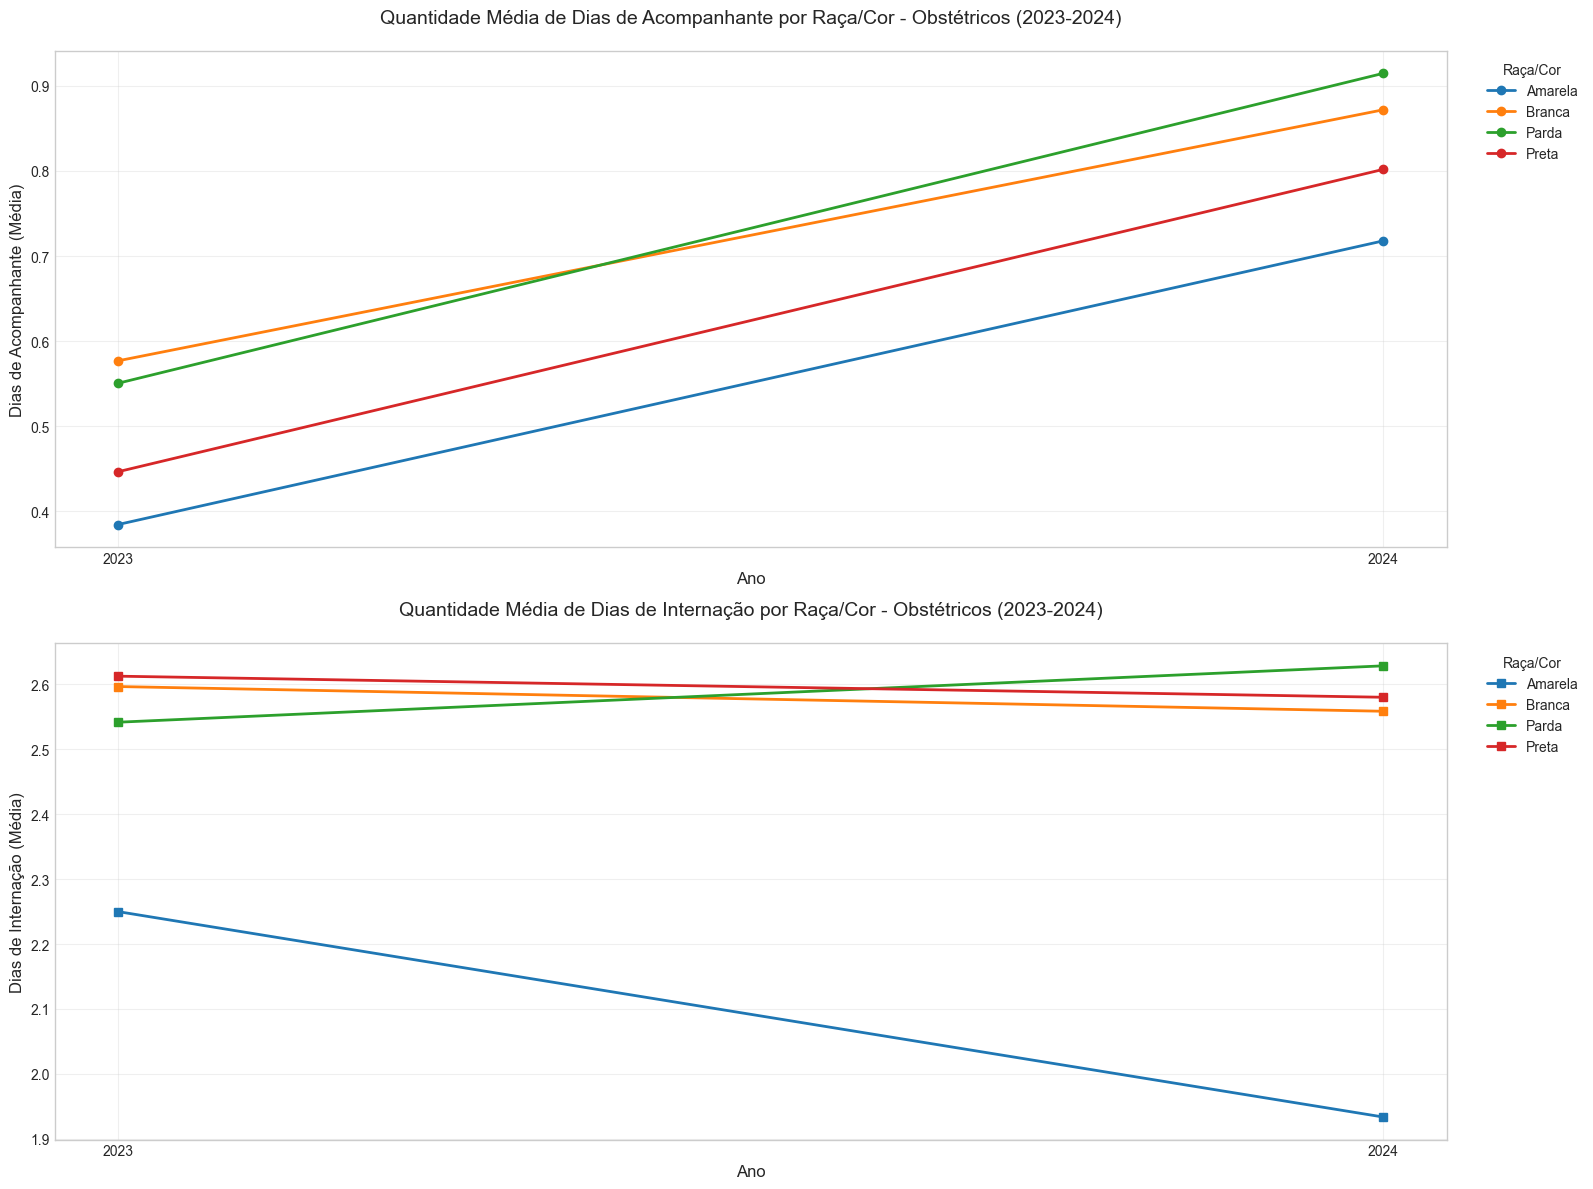


--- Estatísticas Resumo (Obstétricos 2023-2024) ---
Branca:
  Total de registros: 24109
  Média dias acompanhante: 0.76
  Média dias internação: 2.57
  Razão acompanhante/internação: 0.297

Parda:
  Total de registros: 4854
  Média dias acompanhante: 0.78
  Média dias internação: 2.60
  Razão acompanhante/internação: 0.300

Preta:
  Total de registros: 808
  Média dias acompanhante: 0.69
  Média dias internação: 2.59
  Razão acompanhante/internação: 0.267

Amarela:
  Total de registros: 293
  Média dias acompanhante: 0.66
  Média dias internação: 1.99
  Razão acompanhante/internação: 0.331



C:\Users\trabalho\AppData\Local\Temp\ipykernel_23260\1825926993.py:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(racas, rotation=45, ha='right')


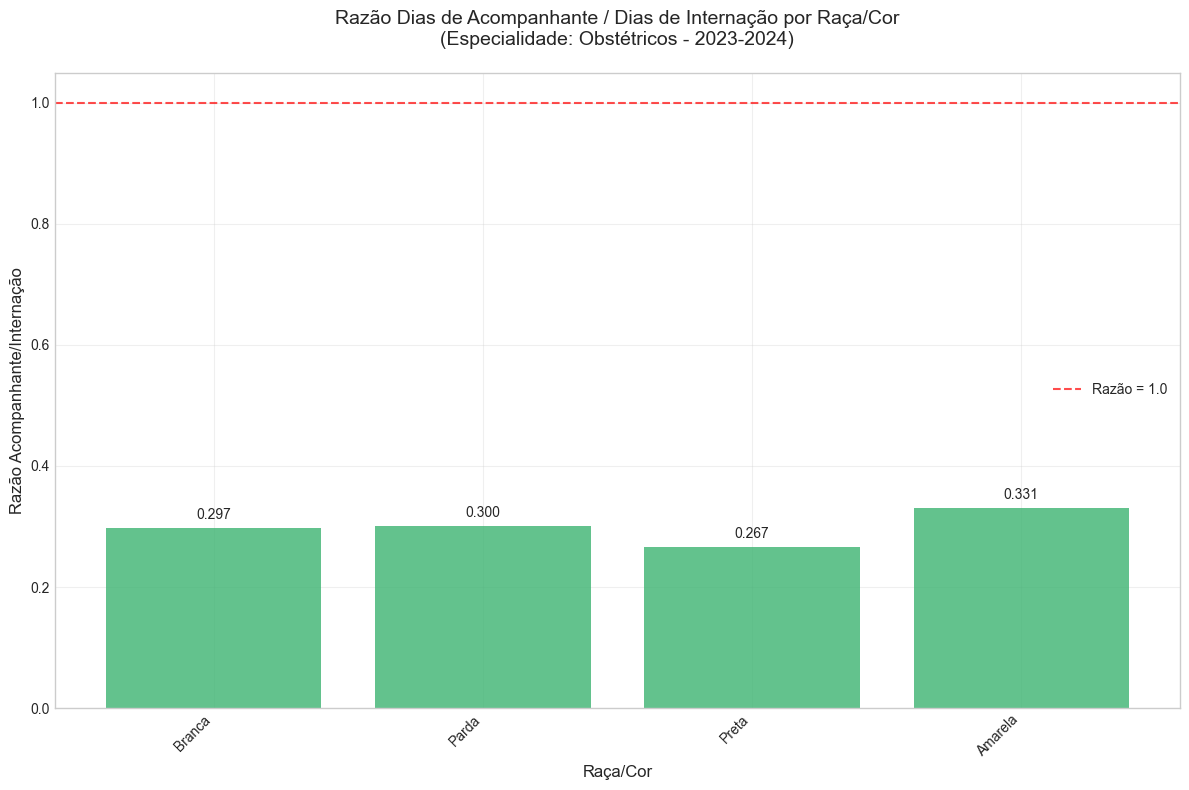

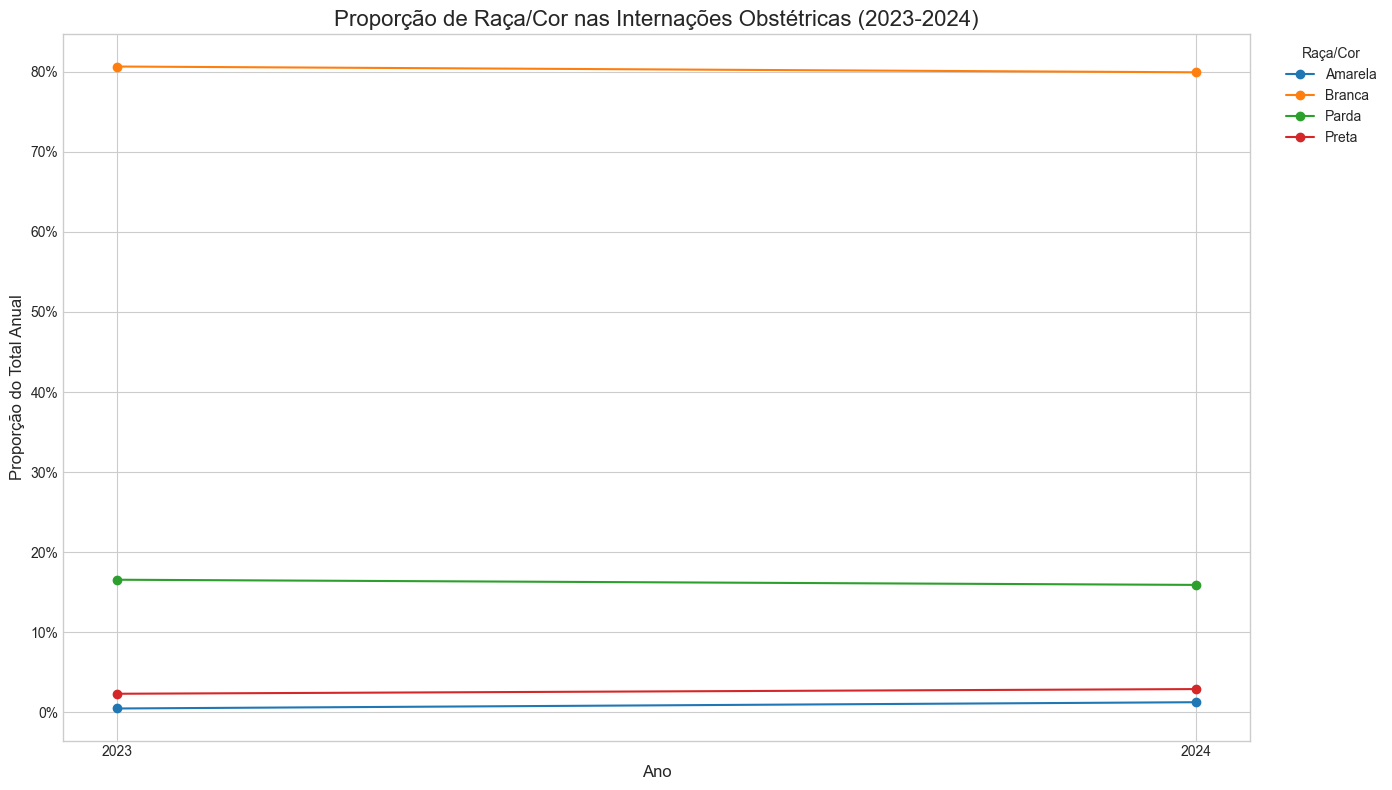


Gráficos salvos com sucesso!
- comparacao_dias_acompanhante_obstetricia_2023_2024.png
- razao_acompanhante_internacao_obstetricia_2023_2024.png
- proporcao_raca_obstetricia_2023_2024.png


In [63]:
# Análise da quantidade de dias de acompanhante por raça para especialidade obstétrica (2023-2024)
import numpy as np

# Prepara os dados removendo valores nulos e filtrando apenas obstétricos
df_analise = df_filtrado.dropna(subset=['ano', 'raca_cor_paciente', 'quantidade_dias_acompanhate', 'quantidade_dias', 'especialidade_leito']).copy()
df_analise = df_analise[df_analise['especialidade_leito'] == '02-Obstétricos']
df_analise['ano'] = df_analise['ano'].astype(int)

# FILTRO: Apenas dados de 2023 e 2024
df_analise = df_analise[df_analise['ano'].isin([2023, 2024])]

# Remove valores extremos que podem ser outliers
df_analise = df_analise[
    (df_analise['quantidade_dias_acompanhate'] <= 365) & 
    (df_analise['quantidade_dias'] <= 365)
]

print(f"Dados preparados (apenas obstétricos 2023-2024): {len(df_analise)} registros para análise")

# 1. Cálculo das médias anuais por raça
medias_acompanhante = df_analise.groupby(['ano', 'raca_cor_paciente'])['quantidade_dias_acompanhate'].mean().unstack(fill_value=0)
medias_internacao = df_analise.groupby(['ano', 'raca_cor_paciente'])['quantidade_dias'].mean().unstack(fill_value=0)

# 2. Criação de subplots para comparação
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Gráfico 1: Quantidade média de dias de acompanhante
medias_acompanhante.plot(ax=ax1, marker='o', linewidth=2)
ax1.set_title('Quantidade Média de Dias de Acompanhante por Raça/Cor - Obstétricos (2023-2024)', fontsize=14, pad=20)
ax1.set_xlabel('Ano', fontsize=12)
ax1.set_ylabel('Dias de Acompanhante (Média)', fontsize=12)
ax1.legend(title='Raça/Cor', bbox_to_anchor=(1.02, 1), loc='upper left')
ax1.grid(True, alpha=0.3)
ax1.set_xticks([2023, 2024])

# Gráfico 2: Quantidade média de dias de internação
medias_internacao.plot(ax=ax2, marker='s', linewidth=2)
ax2.set_title('Quantidade Média de Dias de Internação por Raça/Cor - Obstétricos (2023-2024)', fontsize=14, pad=20)
ax2.set_xlabel('Ano', fontsize=12)
ax2.set_ylabel('Dias de Internação (Média)', fontsize=12)
ax2.legend(title='Raça/Cor', bbox_to_anchor=(1.02, 1), loc='upper left')
ax2.grid(True, alpha=0.3)
ax2.set_xticks([2023, 2024])

plt.tight_layout()
plt.savefig('comparacao_dias_acompanhante_obstetricia_2023_2024.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Análise da razão entre dias de acompanhante e dias de internação
print("\n--- Estatísticas Resumo (Obstétricos 2023-2024) ---")
for raca in df_analise['raca_cor_paciente'].unique():
    if pd.notna(raca) and raca != 'Sem Informação':
        dados_raca = df_analise[df_analise['raca_cor_paciente'] == raca]
        media_acomp = dados_raca['quantidade_dias_acompanhate'].mean()
        media_intern = dados_raca['quantidade_dias'].mean()
        razao = media_acomp / media_intern if media_intern > 0 else 0
        total_registros = len(dados_raca)
        
        print(f"{raca}:")
        print(f"  Total de registros: {total_registros}")
        print(f"  Média dias acompanhante: {media_acomp:.2f}")
        print(f"  Média dias internação: {media_intern:.2f}")
        print(f"  Razão acompanhante/internação: {razao:.3f}")
        print()

# 4. Gráfico de barras da razão acompanhante/internação para 2023-2024
razoes_por_raca = {}
for raca in df_analise['raca_cor_paciente'].unique():
    if pd.notna(raca) and raca != 'Sem Informação':
        dados_raca = df_analise[df_analise['raca_cor_paciente'] == raca]
        media_acomp = dados_raca['quantidade_dias_acompanhate'].mean()
        media_intern = dados_raca['quantidade_dias'].mean()
        razao = media_acomp / media_intern if media_intern > 0 else 0
        razoes_por_raca[raca] = razao

# Gráfico de barras das razões
fig, ax = plt.subplots(figsize=(12, 8))
racas = list(razoes_por_raca.keys())
razoes = list(razoes_por_raca.values())

bars = ax.bar(racas, razoes, alpha=0.8, color='mediumseagreen')
ax.set_title('Razão Dias de Acompanhante / Dias de Internação por Raça/Cor\n(Especialidade: Obstétricos - 2023-2024)', 
             fontsize=14, pad=20)
ax.set_xlabel('Raça/Cor', fontsize=12)
ax.set_ylabel('Razão Acompanhante/Internação', fontsize=12)
ax.set_xticklabels(racas, rotation=45, ha='right')
ax.grid(True, alpha=0.3)

# Adiciona linha de referência (razão = 1.0)
ax.axhline(y=1.0, color='red', linestyle='--', alpha=0.7, label='Razão = 1.0')

# Adiciona valores nas barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{height:.3f}', ha='center', va='bottom', fontsize=10)

ax.legend()
plt.tight_layout()
plt.savefig('razao_acompanhante_internacao_obstetricia_2023_2024.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Proporção de internações por raça na obstetrícia (2023-2024)
contagens_obs = pd.crosstab(df_analise['ano'], df_analise['raca_cor_paciente'])
proporcoes_obs = contagens_obs.div(contagens_obs.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(14, 8))
proporcoes_obs.plot(kind='line', marker='o', ax=ax)
ax.set_title('Proporção de Raça/Cor nas Internações Obstétricas (2023-2024)', fontsize=16)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Proporção do Total Anual', fontsize=12)
ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))
ax.legend(title='Raça/Cor', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.set_xticks([2023, 2024])
plt.tight_layout()
plt.savefig('proporcao_raca_obstetricia_2023_2024.png')
plt.show()

print(f"\nGráficos salvos com sucesso!")
print(f"- comparacao_dias_acompanhante_obstetricia_2023_2024.png")
print(f"- razao_acompanhante_internacao_obstetricia_2023_2024.png")
print(f"- proporcao_raca_obstetricia_2023_2024.png")

Dados preparados: 2622591 registros para análise


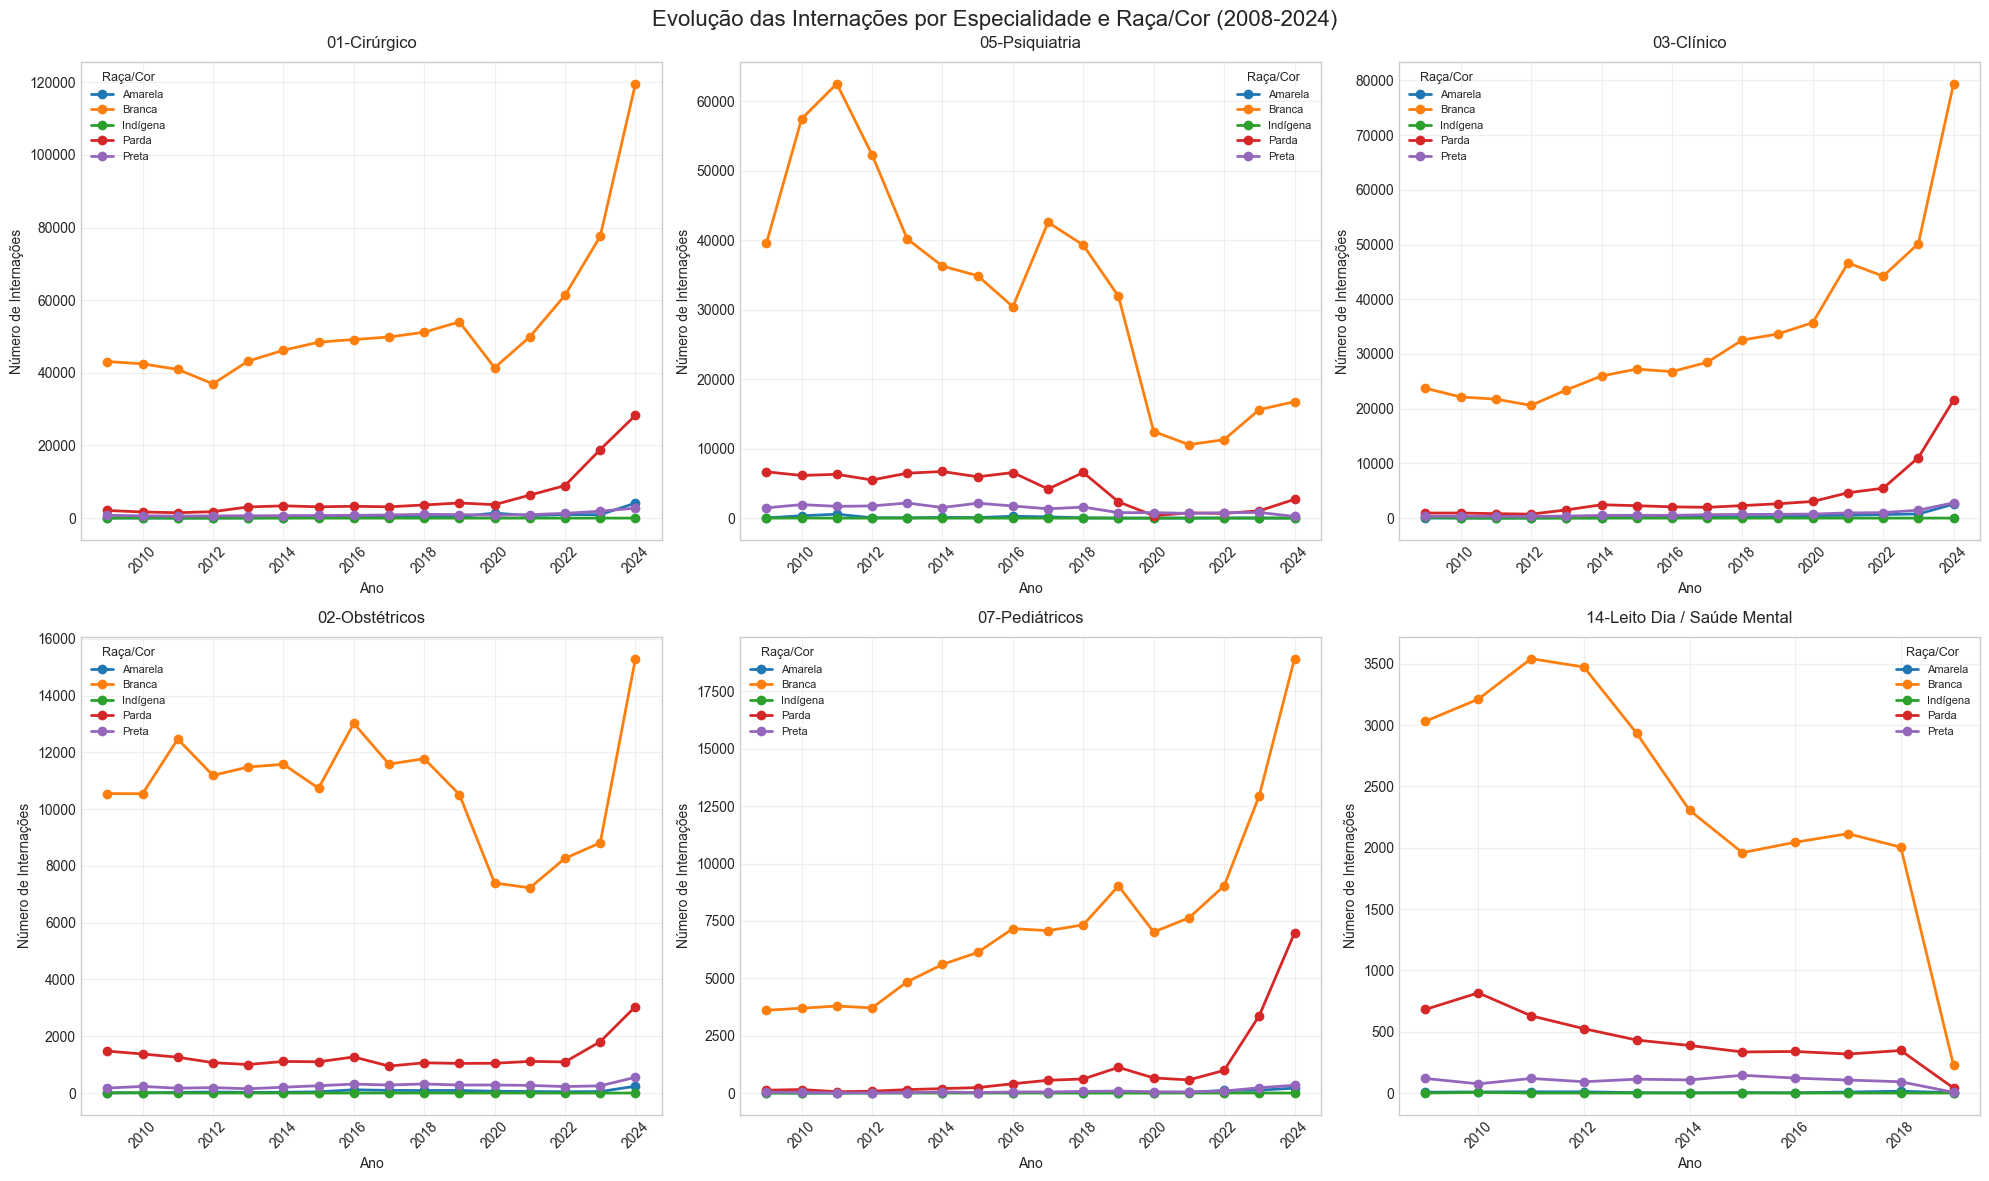

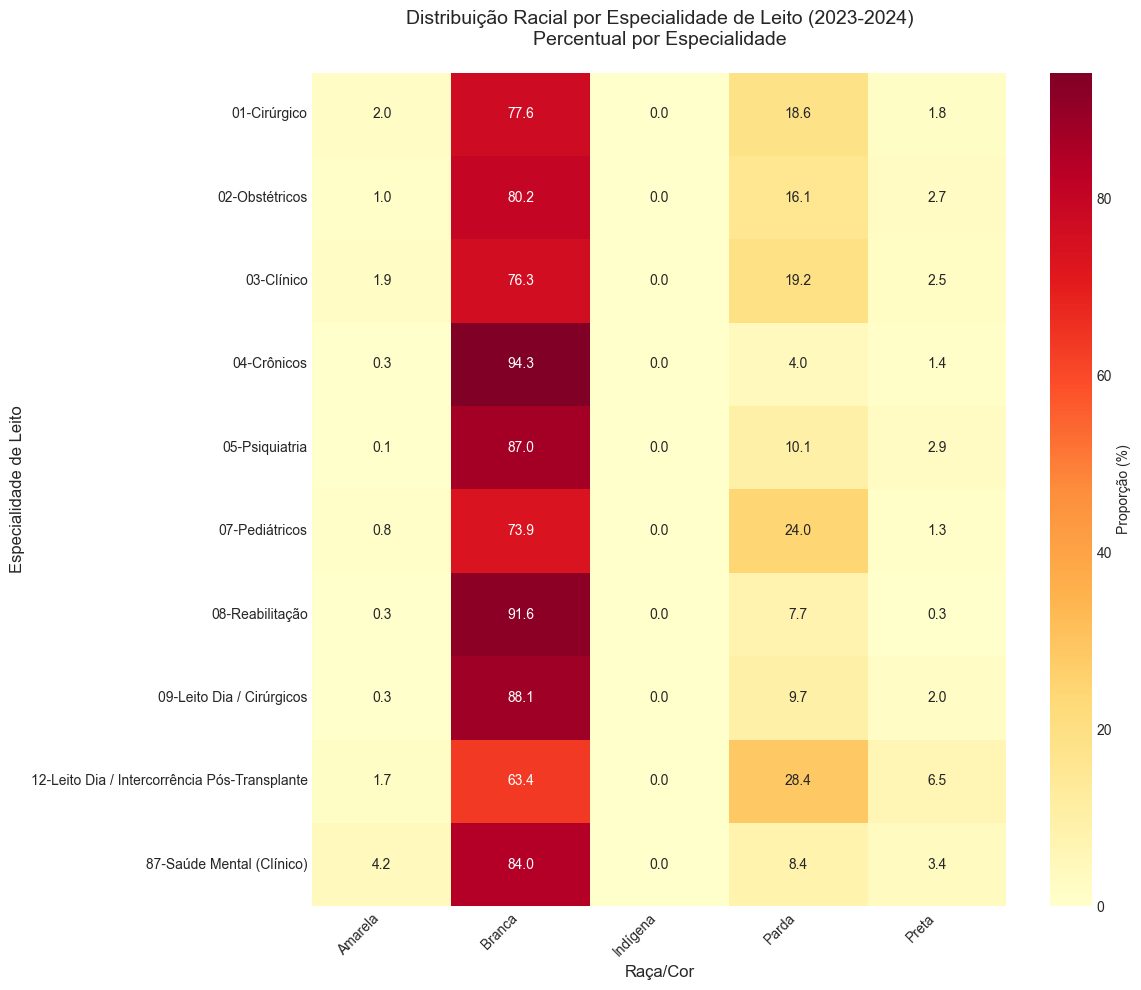

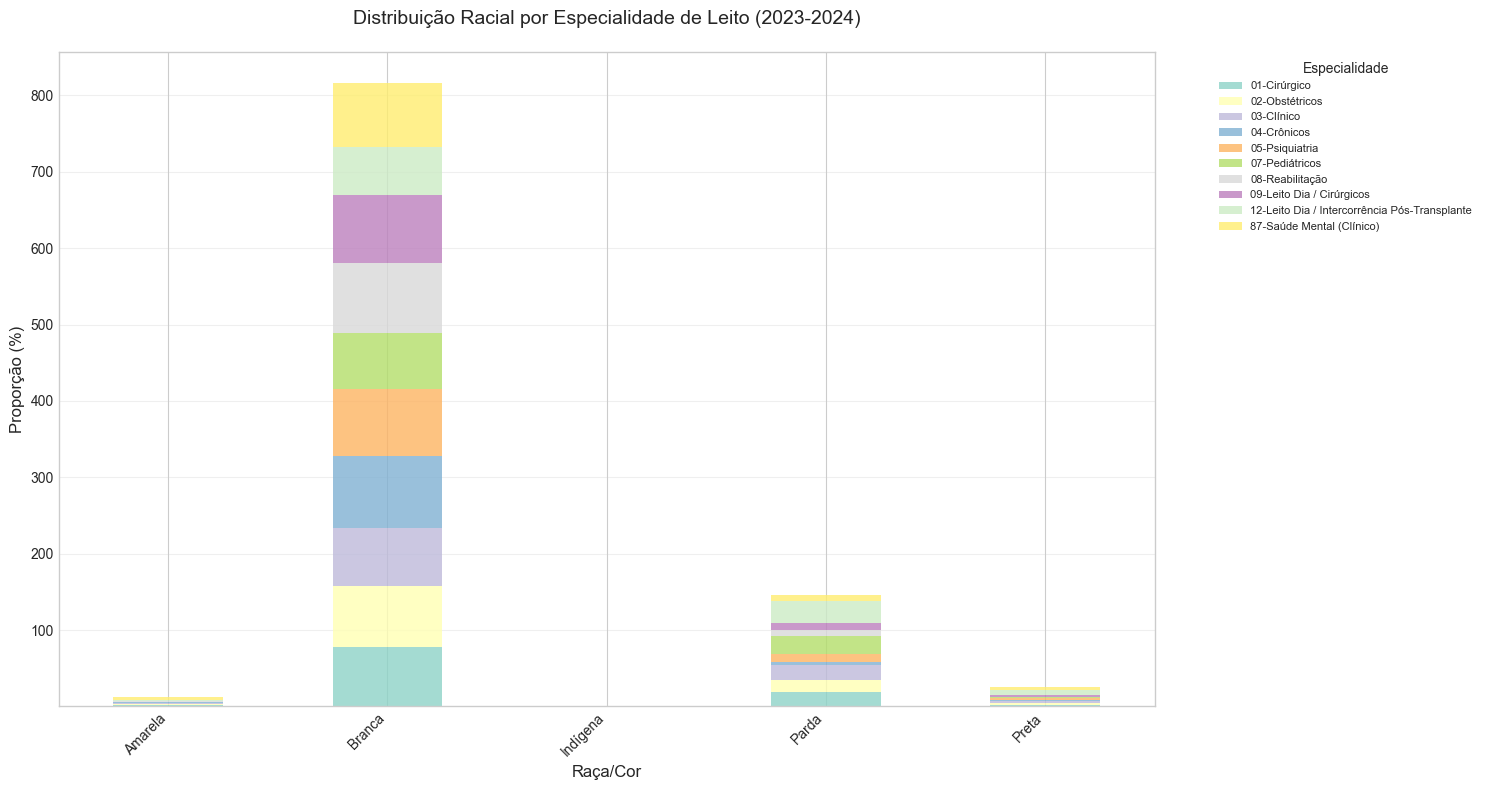


--- Top 10 Especialidades por Volume (2023-2024) ---
01-Cirúrgico: 254089 internações
03-Clínico: 169777 internações
07-Pediátricos: 43156 internações
05-Psiquiatria: 37254 internações
02-Obstétricos: 30064 internações
04-Crônicos: 5536 internações
09-Leito Dia / Cirúrgicos: 3837 internações
87-Saúde Mental (Clínico): 1017 internações
08-Reabilitação: 970 internações
12-Leito Dia / Intercorrência Pós-Transplante: 584 internações

--- Distribuição Racial por Especialidade (%) ---
raca_cor_paciente                              Amarela  Branca  Indígena  \
especialidade_leito                                                        
01-Cirúrgico                                       2.0    77.6       0.0   
02-Obstétricos                                     1.0    80.2       0.0   
03-Clínico                                         1.9    76.3       0.0   
04-Crônicos                                        0.3    94.3       0.0   
05-Psiquiatria                                     0.1    8

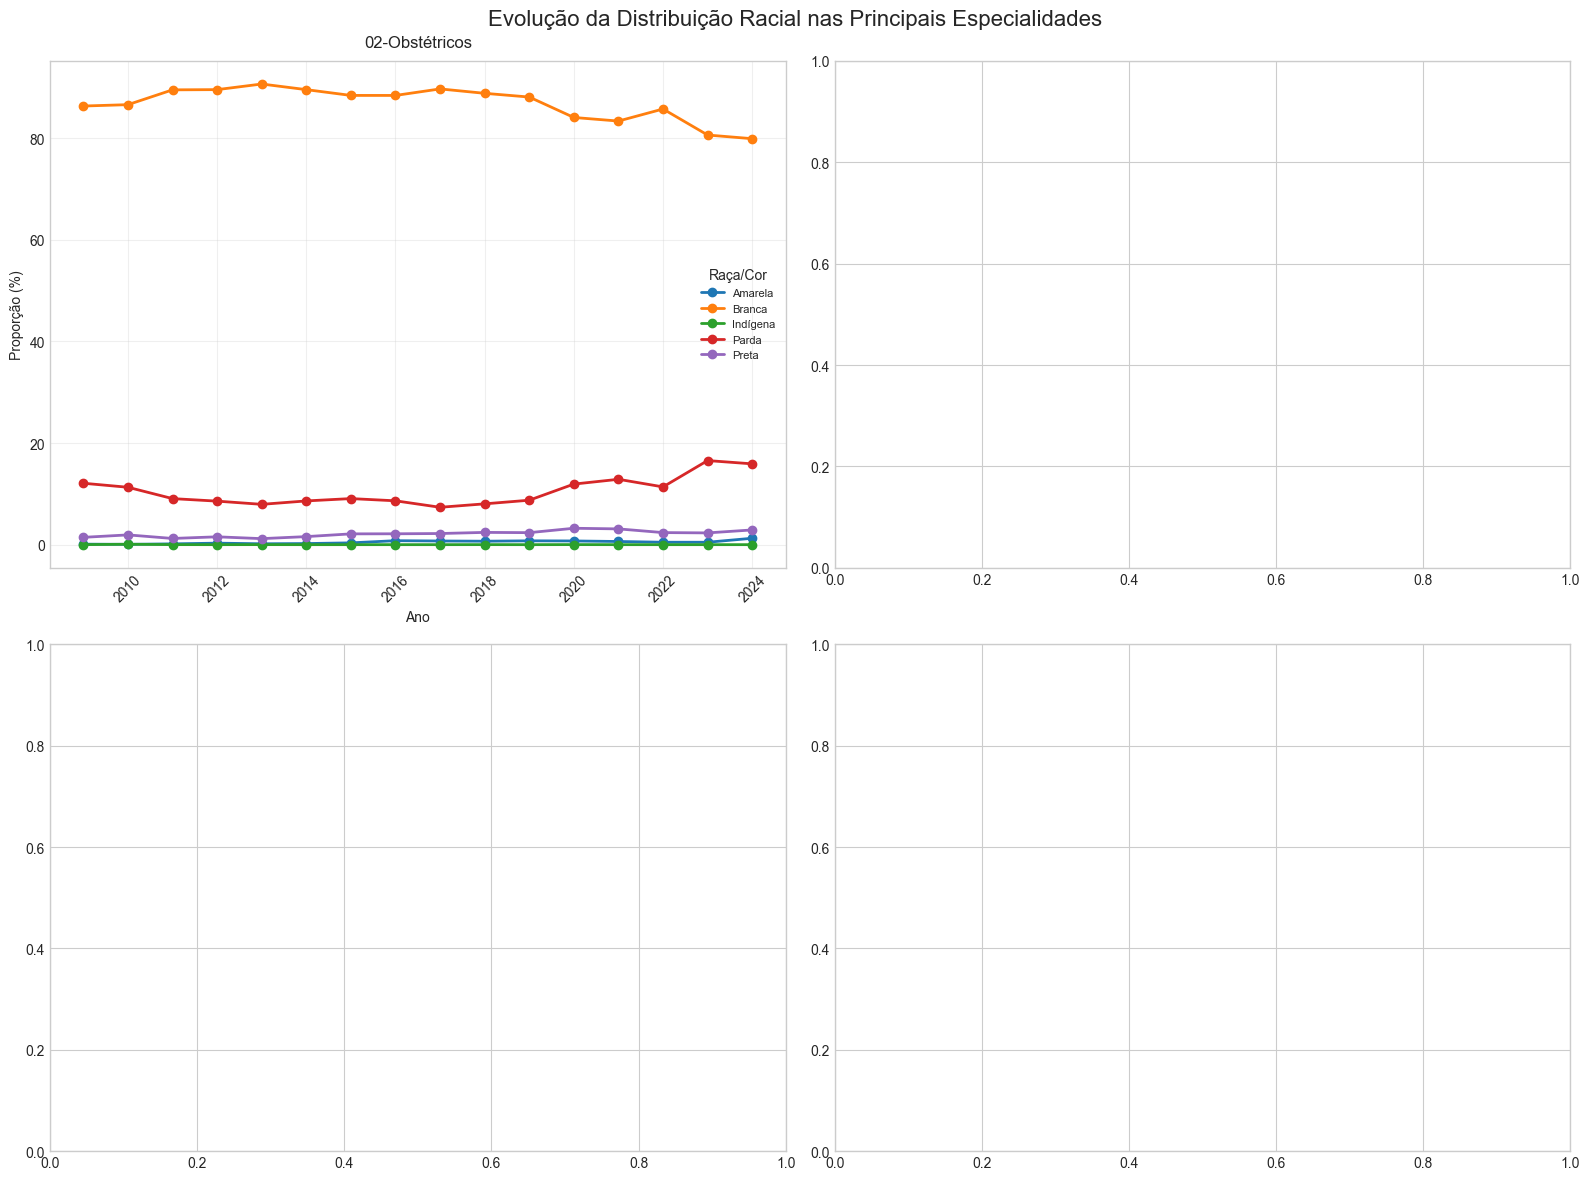


Gráficos salvos com sucesso!
- especialidades_por_raca_evolucao.png
- heatmap_especialidades_raca_2023_2024.png
- barras_empilhadas_especialidades_raca.png
- principais_especialidades_raca_evolucao.png


In [64]:
# Análise de especialidades de leito por raça ao longo dos anos
import numpy as np
import seaborn as sns

# Prepara os dados removendo valores nulos
df_especialidades = df_filtrado.dropna(subset=['ano', 'raca_cor_paciente', 'especialidade_leito']).copy()
df_especialidades['ano'] = df_especialidades['ano'].astype(int)

# Remove "Sem Informação" se existir
df_especialidades = df_especialidades[df_especialidades['raca_cor_paciente'] != 'Sem Informação']

print(f"Dados preparados: {len(df_especialidades)} registros para análise")

# 1. Contagem total por especialidade, raça e ano
contagens_esp = df_especialidades.groupby(['ano', 'especialidade_leito', 'raca_cor_paciente']).size().reset_index(name='contagem')

# 2. Gráfico de linha mostrando evolução das principais especialidades por raça
# Primeiro, vamos identificar as principais especialidades
top_especialidades = df_especialidades['especialidade_leito'].value_counts().head(6).index

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, especialidade in enumerate(top_especialidades):
    df_esp = df_especialidades[df_especialidades['especialidade_leito'] == especialidade]
    contagens_raca_ano = pd.crosstab(df_esp['ano'], df_esp['raca_cor_paciente'])
    
    contagens_raca_ano.plot(ax=axes[i], marker='o', linewidth=2)
    axes[i].set_title(f'{especialidade}', fontsize=12, pad=10)
    axes[i].set_xlabel('Ano', fontsize=10)
    axes[i].set_ylabel('Número de Internações', fontsize=10)
    axes[i].legend(title='Raça/Cor', fontsize=8, title_fontsize=9)
    axes[i].grid(True, alpha=0.3)
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle('Evolução das Internações por Especialidade e Raça/Cor (2008-2024)', fontsize=16, y=0.98)
plt.tight_layout()
plt.savefig('especialidades_por_raca_evolucao.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Heatmap das proporções de raça por especialidade (dados mais recentes)
# Usando dados de 2023-2024 para maior confiabilidade
df_recente = df_especialidades[df_especialidades['ano'].isin([2023, 2024])]

# Cria tabela de contingência
contingencia = pd.crosstab(df_recente['especialidade_leito'], df_recente['raca_cor_paciente'])

# Calcula proporções por linha (cada especialidade soma 100%)
proporcoes_esp = contingencia.div(contingencia.sum(axis=1), axis=0) * 100

# Filtra apenas especialidades com mais de 100 casos para análise mais robusta
especialidades_relevantes = contingencia[contingencia.sum(axis=1) > 100].index
proporcoes_filtradas = proporcoes_esp.loc[especialidades_relevantes]

# Cria o heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(proporcoes_filtradas, 
            annot=True, 
            fmt='.1f', 
            cmap='YlOrRd', 
            cbar_kws={'label': 'Proporção (%)'})
plt.title('Distribuição Racial por Especialidade de Leito (2023-2024)\nPercentual por Especialidade', 
          fontsize=14, pad=20)
plt.xlabel('Raça/Cor', fontsize=12)
plt.ylabel('Especialidade de Leito', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('heatmap_especialidades_raca_2023_2024.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Gráfico de barras empilhadas para visualizar distribuição racial por especialidade
fig, ax = plt.subplots(figsize=(15, 8))

# Usa as mesmas especialidades filtradas
dados_plot = proporcoes_filtradas.T  # Transpõe para ter raças nas linhas

dados_plot.plot(kind='bar', stacked=True, ax=ax, 
                colormap='Set3', alpha=0.8)

ax.set_title('Distribuição Racial por Especialidade de Leito (2023-2024)', fontsize=14, pad=20)
ax.set_xlabel('Raça/Cor', fontsize=12)
ax.set_ylabel('Proporção (%)', fontsize=12)
ax.legend(title='Especialidade', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
ax.set_xticklabels(dados_plot.index, rotation=45, ha='right')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('barras_empilhadas_especialidades_raca.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Análise estatística das diferenças
print("\n--- Top 10 Especialidades por Volume (2023-2024) ---")
volume_por_esp = df_recente['especialidade_leito'].value_counts().head(10)
for esp, count in volume_por_esp.items():
    print(f"{esp}: {count} internações")

print("\n--- Distribuição Racial por Especialidade (%) ---")
print(proporcoes_filtradas.round(1))

# 6. Gráfico focado apenas em Obstetrícia vs outras especialidades principais
especialidades_foco = ['02-Obstétricos', '01-Clínica Médica', '03-Clínica Cirúrgica', '05-Pediatria']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, esp in enumerate(especialidades_foco):
    if esp in df_especialidades['especialidade_leito'].values:
        df_esp = df_especialidades[df_especialidades['especialidade_leito'] == esp]
        
        # Calcula proporções por ano
        contagens = pd.crosstab(df_esp['ano'], df_esp['raca_cor_paciente'])
        proporcoes = contagens.div(contagens.sum(axis=1), axis=0) * 100
        
        proporcoes.plot(ax=axes[i], marker='o', linewidth=2)
        axes[i].set_title(f'{esp}', fontsize=12, pad=10)
        axes[i].set_xlabel('Ano', fontsize=10)
        axes[i].set_ylabel('Proporção (%)', fontsize=10)
        axes[i].legend(title='Raça/Cor', fontsize=8)
        axes[i].grid(True, alpha=0.3)
        axes[i].tick_params(axis='x', rotation=45)

plt.suptitle('Evolução da Distribuição Racial nas Principais Especialidades', fontsize=16, y=0.98)
plt.tight_layout()
plt.savefig('principais_especialidades_raca_evolucao.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nGráficos salvos com sucesso!")
print(f"- especialidades_por_raca_evolucao.png")
print(f"- heatmap_especialidades_raca_2023_2024.png")
print(f"- barras_empilhadas_especialidades_raca.png")
print(f"- principais_especialidades_raca_evolucao.png")

In [60]:
df_filtrado['especialidade_leito'].value_counts()

especialidade_leito
01-Cirúrgico                                     978512
05-Psiquiatria                                   626775
03-Clínico                                       625287
02-Obstétricos                                   198484
07-Pediátricos                                   135653
14-Leito Dia / Saúde Mental                       32877
09-Leito Dia / Cirúrgicos                          8202
04-Crônicos                                        5937
10-Leito Dia / Aids                                2926
08-Reabilitação                                    2660
12-Leito Dia / Intercorrência Pós-Transplante      2167
06-Pneumologia Sanitária (Tisiologia)              1719
87-Saúde Mental (Clínico)                          1392
Name: count, dtype: int64

In [67]:
df_filtrado['motivo_saida'].value_counts()

motivo_saida
Alta melhorado                                        952059
Alta com previsão de retorno p/acomp do paciente      658514
Permanência por características próprias da doença    340927
Permanência por impossibilidade sócio-familiar        182895
Alta da mãe/puérpera e do recém-nascido               151171
Permanência por reoperação                            101887
Óbito com DO fornecida pelo médico assistente          87631
Alta da mãe/puérpera e permanência recém-nascido       37737
Transferência para outro estabelecimento               24973
Alta a pedido                                          17187
Alta por outros motivos                                16065
Permanência por mudança de procedimento                12238
Encerramento administrativo                            11811
Alta por evasão                                         8471
Permanência por intercorrência                          5026
Permanência proc doação órg, tec, cél-doador morto      4824
Óbito com D

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476243 entries, 0 to 4476242
Data columns (total 68 columns):
 #   Column                                             Dtype  
---  ------                                             -----  
 0   ano                                                int64  
 1   mes                                                int64  
 2   id_aih                                             int64  
 3   tipo_aih                                           object 
 4   motivo_autorizacao_aih                             object 
 5   sequencial_aih                                     int64  
 6   especialidade_leito                                object 
 7   motivo_saida                                       object 
 8   tipo_uti                                           object 
 9   tipo_uci                                           object 
 10  carater_internacao                                 object 
 11  data_internacao                                   